In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv('AppleStore.csv')

In [3]:
df.head()
#The following shows how the dataset is structured, with 16 columns and 7196 rows.

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


In [5]:
df.describe()

#show the statistics of my dataset

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [6]:
prime_genre = df.groupby('prime_genre')['prime_genre'].agg(['count']).reset_index()
prime_genre.sort_values('count', ascending=False, inplace=True)
prime_genre

#show one of the categorical variables

,prime_genre,count
7,Games,3862
4,Entertainment,535
3,Education,453
14,Photo & Video,349
21,Utilities,248
8,Health & Fitness,180
15,Productivity,178
18,Social Networking,167
9,Lifestyle,144
11,Music,138


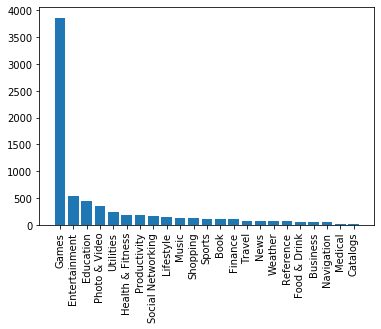

In [7]:
plt.bar(prime_genre['prime_genre'], prime_genre['count'])
plt.xticks(rotation='vertical')
plt.show()

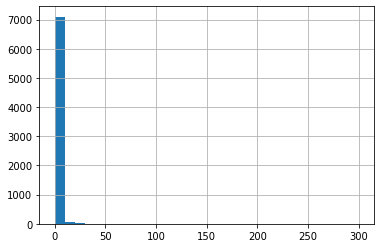

In [8]:
df['price'].hist(bins=30)

#shows one of the numeric variables, on which linear regression is based.

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

def print_metrics(y_true, y_pred):
    print(f'MAE: {mean_absolute_error(y_true, y_pred)}')
    print(f'MSE: {mean_squared_error(y_true, y_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_true, y_pred))}')
    print(f'R2: {r2_score(y_true, y_pred)}')

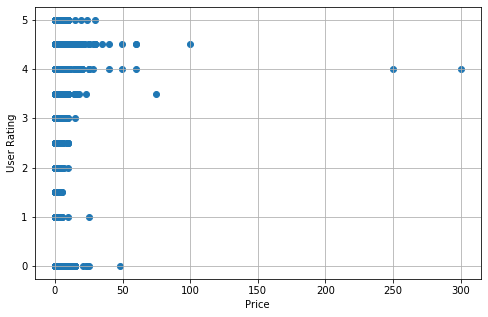

In [10]:
def linRegr(): 
    plt.figure(figsize=(8, 5))
    plt.scatter(df['price'], df['user_rating'])
    plt.xlabel('Price')
    plt.ylabel('User Rating')
    plt.grid()
    plt.show()
    
linRegr()
#Here I defined the method for calculating linear regression on my dataset, 
#defined using "Price" as an independent variable and "User Rating" as a dependent variable.
#before commenting on the plot, I defined the outliers, that is, all the applications that are priced above € 50

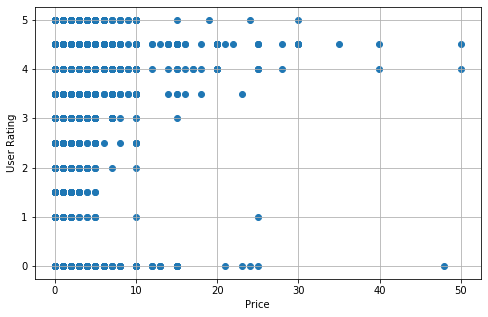

In [11]:
def deletePriceMore50():
    c=0
    lista=[]
    for i in df:
        if i=='price':
            for j in df[i]:
                if j>50:
                    lista.append(c)
                c=c+1 
    for i in lista:
        df.drop(i,inplace=True)
        
deletePriceMore50()
linRegr()

#Here I decided to eliminate all the occurrences of applications with a price above 50, defining them as outliers.
#I used this method and then called to make changes to the dataset.

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
X = df['price'].values.reshape(-1, 1)
y = df['user_rating'].values.reshape(-1, 1)
lr.fit(X, y)
y_pred = lr.predict(X)

print('Training error:')
print_metrics(y, lr.predict(X))

print()
print('Model parameters:')
print(lr.coef_, lr.intercept_)

#Here linear regression is performed using "Price" as an independent variable and "User Rating" as
#an dependent variable, as we can see from the results it is not what I expected as I believed there 
#could be a functional link between the two variables but it is not so, the coefficient R ^ 2 is very 
#close to zero while MSE is far from zero, we understand that the the model does not explain the dependent variable well.

Training error:
MAE: 1.133800490508944
MSE: 2.293232349942226
RMSE: 1.5143422169186944
R2: 0.005363670257376829

Model parameters:
[[0.0359177]] [3.4688145]


In [13]:
from sklearn.model_selection import train_test_split

# I leave the default proportions, 75% / 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)
lr.fit(X_train, y_train)

print('Training error:')
print_metrics(y_train, lr.predict(X_train))

print()
print('Test error:')
print_metrics(y_test, lr.predict(X_test))

#Here I tried to apply the Train / test slipt technique, leaving the proportions
#for training at 75% and for testing at 25%. We note that the results change little in R^2 and MSE, not very notable.

Training error:
MAE: 1.1249338013469883
MSE: 2.2684878698720263
RMSE: 1.506150015726198
R2: 0.006356741448204195

Test error:
MAE: 1.1600155091017754
MSE: 2.3678554555171334
RMSE: 1.5387837585304613
R2: 0.002317165270910304


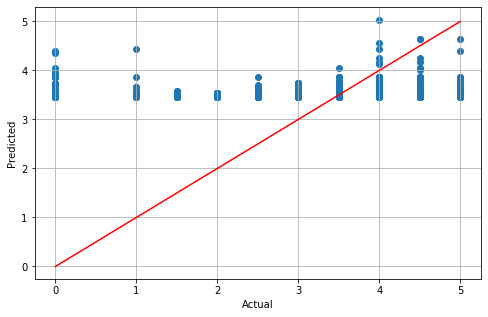

In [14]:
def plot_true_vs_pred(y_true, y_pred):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_true, y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid()
    plt.show()
    
plot_true_vs_pred(y_test, lr.predict(X_test))

In [15]:
mlr_features = ['rating_count_tot', 'rating_count_ver', 'size_bytes']

X = df[mlr_features].values
y = df['price'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

#Here I added features for multiple linear regression, independent variables, in particular "total rating count",
#"rating count per version" and "size in byte of the application". These features have been related to "Price",
# dipendent variable.

Training error:
MAE: 1.7500340311936737
MSE: 8.278904764538394
RMSE: 2.8773085973767905
R2: 0.12699843095353136

Test error:
MAE: 1.8179899692260522
MSE: 9.56222202337092
RMSE: 3.0922842727296143
R2: 0.03319407026046939


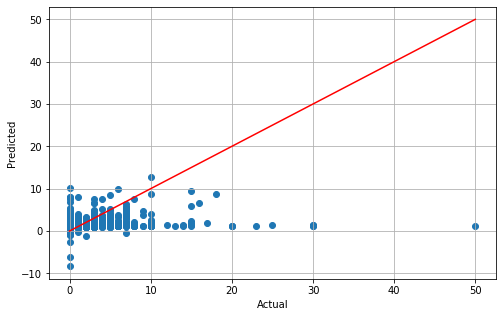

In [16]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

print('Training error:')
print_metrics(y_train, mlr.predict(X_train))
print()
print('Test error:')
print_metrics(y_test, mlr.predict(X_test))

plot_true_vs_pred(y_test, mlr.predict(X_test))

#Also here, the multiple linear regression gives bad results as we note
#the coefficient R ^ 2 very distant from 1 and the MSE very distant to zero, 
#from the plot it is in fact understood how the real model is distant from 
#the ideal model, therefore the features chosen are not have a strong addictive relationship with "Price".

Training error:
MAE: 1.7301390268350678
MSE: 8.156142399113202
RMSE: 2.855896076385344
R2: 0.13994358984642075

Test error:
MAE: 1.8097409776898168
MSE: 9.60106086685351
RMSE: 3.0985578688889306
R2: 0.02926719802393063


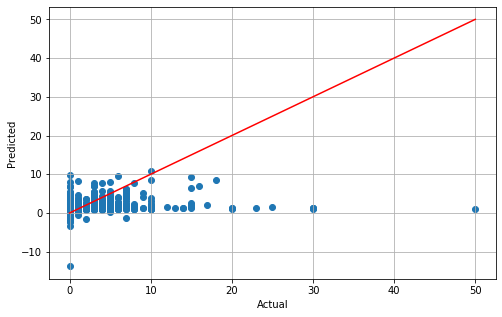

In [17]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial features: 2nd degree
poly2 = PolynomialFeatures(degree=2)
X_train_p2 = poly2.fit_transform(X_train)
X_test_p2 = poly2.fit_transform(X_test)

mlr2 = LinearRegression(normalize=True)
mlr2.fit(X_train_p2, y_train)

print('Training error:')
print_metrics(y_train, mlr2.predict(X_train_p2))
print()
print('Test error:')
print_metrics(y_test, mlr2.predict(X_test_p2))

plot_true_vs_pred(y_test, mlr2.predict(X_test_p2))

Training error:
MAE: 1.7185014977237427
MSE: 8.066290741594997
RMSE: 2.8401216068321786
R2: 0.14941835012278115

Test error:
MAE: 1.8595812589916605
MSE: 15.933905677811547
RMSE: 3.9917296599107943
R2: -0.6110266479451538


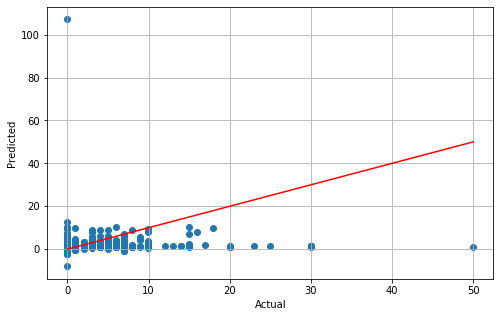

In [18]:
# Polynomial features: 3rd degree
poly3 = PolynomialFeatures(degree=3)
X_train_p3 = poly3.fit_transform(X_train)
X_test_p3 = poly3.fit_transform(X_test)

mlr3 = LinearRegression(normalize=True)
mlr3.fit(X_train_p3, y_train)

print('Training error:')
print_metrics(y_train, mlr3.predict(X_train_p3))
print()
print('Test error:')
print_metrics(y_test, mlr3.predict(X_test_p3))

plot_true_vs_pred(y_test, mlr3.predict(X_test_p3))

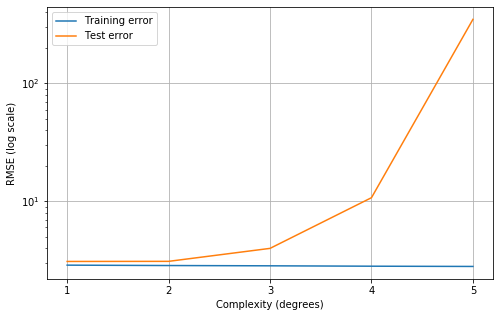

In [19]:
train_errors, test_errors = [], []
degrees = list(range(1, 6))

for deg in degrees:
    poly = PolynomialFeatures(degree=deg)
    X_train_p = poly.fit_transform(X_train)
    X_test_p = poly.fit_transform(X_test)

    mlrp = LinearRegression(normalize=True)
    mlrp.fit(X_train_p, y_train)
    
    # RMSE
    train_error = np.sqrt(mean_squared_error(y_train, mlrp.predict(X_train_p)))
    test_error = np.sqrt(mean_squared_error(y_test, mlrp.predict(X_test_p)))
    train_errors.append(train_error)
    test_errors.append(test_error)
    
plt.figure(figsize=(8, 5))
plt.plot(train_errors, label='Training error')
plt.plot(test_errors, label='Test error')
plt.xticks(range(0, 5), degrees)
plt.xlabel('Complexity (degrees)')
plt.ylabel('RMSE (log scale)')
plt.legend()
plt.yscale('log')
plt.grid()
plt.show()

C:\Users\Pasquale Siciliano\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21749.320280439977, tolerance: 5.113376203796364
  positive)
C:\Users\Pasquale Siciliano\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21749.32031150449, tolerance: 5.113376203796364
  positive)
C:\Users\Pasquale Siciliano\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21749.32062214535, tolerance: 5.113376203796364
  positive)
C:\Users\Pasquale Siciliano\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might

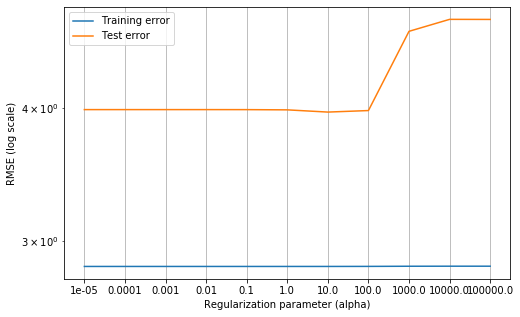

In [20]:
from sklearn.linear_model import Lasso

train_errors, test_errors = [], []
alphas = np.geomspace(1e-5, 1e5, 11)

# Using 3rd degree polynomial features
for alpha in alphas:
    rr = Lasso(alpha=alpha)
    rr.fit(X_train_p3, y_train)
    
    # RMSE
    train_error = np.sqrt(mean_squared_error(y_train, rr.predict(X_train_p3)))
    test_error = np.sqrt(mean_squared_error(y_test, rr.predict(X_test_p3)))
    train_errors.append(train_error)
    test_errors.append(test_error)
    
plt.figure(figsize=(8, 5))
plt.plot(train_errors, label='Training error')
plt.plot(test_errors, label='Test error')
plt.xticks(range(0, len(alphas)), alphas)
plt.xlabel('Regularization parameter (alpha)')
plt.ylabel('RMSE (log scale)')
plt.legend()
plt.yscale('log')
plt.grid()
plt.show()

Training error:
MAE: 1.7197623285765122
MSE: 8.074309566110728
RMSE: 2.8415329605884794
R2: 0.14857277373517408

Test error:
MAE: 1.887297225923703
MSE: 22.23938092619308
RMSE: 4.715864812120157
R2: -1.2485532442803486


C:\Users\Pasquale Siciliano\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21772.517191739124, tolerance: 5.113376203796364
  positive)


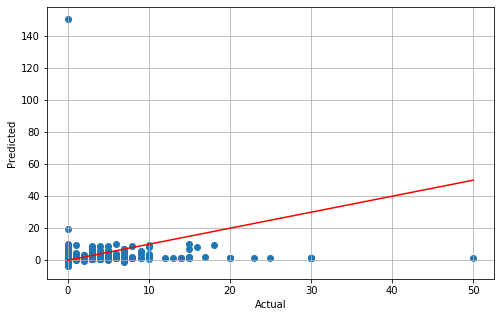

In [21]:
# Check with particular alpha value:
rr1 = Lasso(alpha=1000)
rr1.fit(X_train_p3, y_train)

print('Training error:')
print_metrics(y_train, rr1.predict(X_train_p3))
print()
print('Test error:')
print_metrics(y_test, rr1.predict(X_test_p3))

plot_true_vs_pred(y_test, rr1.predict(X_test_p3))


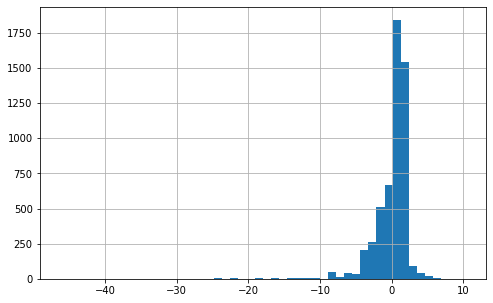

In [22]:
diffs = rr1.predict(X_train_p3) - y_train.reshape(-1)

plt.figure(figsize=(8, 5))
plt.hist(diffs, bins=50)
plt.grid()
plt.show()

In [23]:
# Start with Random Forest Regression
# select price and rating count tot for x
# select user rating for y
x = df.iloc[:, 5:6].values  
print(x) 
y = df.iloc[:, 8].values   
print(y)

[[3.99]
 [0.  ]
 [0.  ]
 ...
 [1.99]
 [0.  ]
 [0.  ]]
[4.  4.  3.5 ... 4.5 4.5 5. ]


In [24]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 

# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

# fit the regressor with x and y data 
regressor.fit(x, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

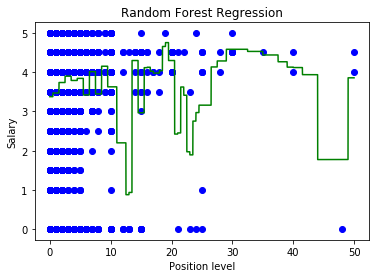

In [25]:
# Visualising the Random Forest Regression results 
# arange for creating a range of values 
# from min value of x to max  
# value of x with a difference of 0.01  
# between two consecutive values 
X_grid = np.arange(min(x), max(x), 0.01)  

# reshape for reshaping the data into a len(X_grid)*1 array,  
# i.e. to make a column out of the X_grid value                   
X_grid = X_grid.reshape((len(X_grid), 1)) 

# Scatter plot for original data 
plt.scatter(x, y, color = 'blue')   

# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid),  
         color = 'green')  
plt.title('Random Forest Regression') 
plt.xlabel('Position level') 
plt.ylabel('Salary') 
plt.show()

In [26]:
# start of Classification task, I used the Random Forest and Decision Tree

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_metrics(y_true, y_pred):
    print(f'Accuracy : {accuracy_score(y_true, y_pred):.2f}')
    print(f'Precision: {precision_score(y_true, y_pred):.2f}')
    print(f'Recall   : {recall_score(y_true, y_pred):.2f}')
    print(f'F1-score : {f1_score(y_true, y_pred):.2f}')

In [27]:
def plot_decision_boundaries(X, y, feature_labels, class_labels, model=None):
    
    reduced_data = X[:, :2]

    h = .01         
    margin = 0.5

    x_min, x_max = reduced_data[:, 0].min() - margin, reduced_data[:, 0].max() + margin
    y_min, y_max = reduced_data[:, 1].min() - margin, reduced_data[:, 1].max() + margin
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    if model:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    if model:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.4)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, edgecolors='black')
    plt.xlabel(feature_labels[0])
    plt.ylabel(feature_labels[1])
    return plt

Text(0.5, 1.0, 'User Rating')

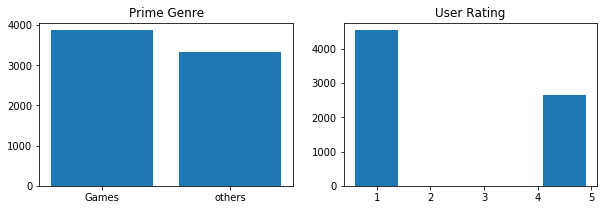

In [28]:
df['prg'] = df['prime_genre'].apply(lambda x: x if x == 'Games' else 'others')
df['usr'] = df['user_rating'].apply(lambda x: x if x == 4.5 else 1)

def plot_counts(df, col):
    users_count2 = df.groupby(col)[col].agg(['count']).reset_index()
    users_count2.sort_values('count', ascending=False, inplace=True)
    plt.bar(users_count2[col], users_count2['count'])
    
fig = plt.figure(figsize=(10, 3))

fig.add_subplot(121)
plot_counts(df, 'prg')
plt.title('Prime Genre')

fig.add_subplot(122)
plot_counts(df, 'usr')
plt.title('User Rating')

In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

filter1 = (df['price'].notnull())
df_filtered = df[filter1].reset_index()

train_indexes, test_indexes = train_test_split(df_filtered.index, random_state=150)

X = df_filtered[['user_rating', 'price']].values
feature_names = ['User Rating', 'Price']

X = StandardScaler().fit_transform(X)

X_train, X_test = X[train_indexes], X[test_indexes]

le_orbit, le_users = LabelEncoder(), LabelEncoder()
y_orbit = le_orbit.fit_transform(df_filtered['prg'])
y_users = le_users.fit_transform(df_filtered['usr'])
y_orbit_train, y_orbit_test = y_orbit[train_indexes], y_orbit[test_indexes]
y_users_train, y_users_test = y_users[train_indexes], y_users[test_indexes]

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [31]:
dt_orbit1 = DecisionTreeClassifier()
rfc_orbit1= RandomForestClassifier()

In [32]:
dt_orbit1.fit(X_train, y_orbit_train)
rfc_orbit1.fit(X_train, y_orbit_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Text(0.5, 1.0, 'Decision tree')

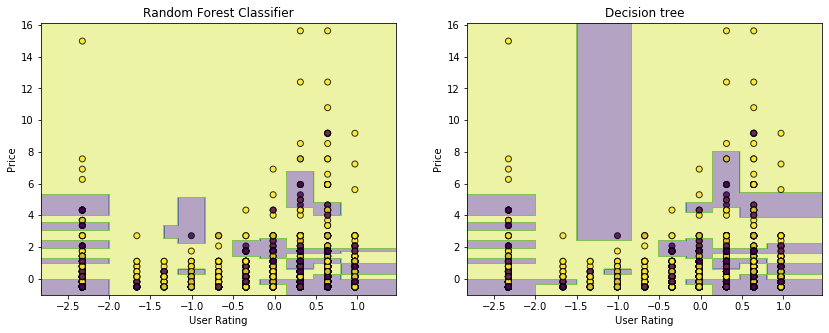

In [33]:
fig = plt.figure(figsize=(14, 5))

fig.add_subplot(121)
plot_decision_boundaries(X_train, y_orbit_train, 
                         feature_names, le_orbit.classes_, rfc_orbit1)
plt.title('Random Forest Classifier')

fig.add_subplot(122)
plot_decision_boundaries(X_train, y_orbit_train, 
                         feature_names, le_orbit.classes_, dt_orbit1)
plt.title('Decision tree')

In [34]:
print('Random Forest Classifier')
print('-------------------')
print('Training set:')
print_metrics(y_orbit_train, rfc_orbit1.predict(X_train))

print()
print('Test set:')
print_metrics(y_orbit_test, rfc_orbit1.predict(X_test))

Random Forest Classifier
-------------------
Training set:
Accuracy : 0.62
Precision: 0.63
Recall   : 0.47
F1-score : 0.54

Test set:
Accuracy : 0.62
Precision: 0.62
Recall   : 0.47
F1-score : 0.53


In [35]:
print('Decision tree')
print('-------------------')
print('Training set:')
print_metrics(y_orbit_train, dt_orbit1.predict(X_train))

print()
print('Test set:')
print_metrics(y_orbit_test, dt_orbit1.predict(X_test))

Decision tree
-------------------
Training set:
Accuracy : 0.62
Precision: 0.63
Recall   : 0.46
F1-score : 0.54

Test set:
Accuracy : 0.62
Precision: 0.61
Recall   : 0.46
F1-score : 0.53


Text(0.5, 1.0, 'Decision tree')

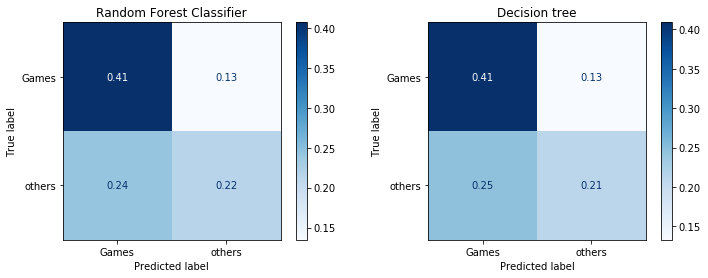

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_confusion_matrix(rfc_orbit1, X_test, y_orbit_test,
                      cmap=plt.cm.Blues, normalize='all', 
                      display_labels=le_orbit.classes_, ax=ax1)
ax1.set_title('Random Forest Classifier')

plot_confusion_matrix(dt_orbit1, X_test, y_orbit_test,
                      cmap=plt.cm.Blues, normalize='all', 
                      display_labels=le_orbit.classes_, ax=ax2)
ax2.set_title('Decision tree')

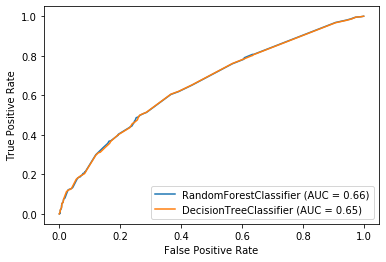

In [37]:
roc = plot_roc_curve(rfc_orbit1, X_test, y_orbit_test)
plot_roc_curve(dt_orbit1, X_test, y_orbit_test, ax=roc.ax_)

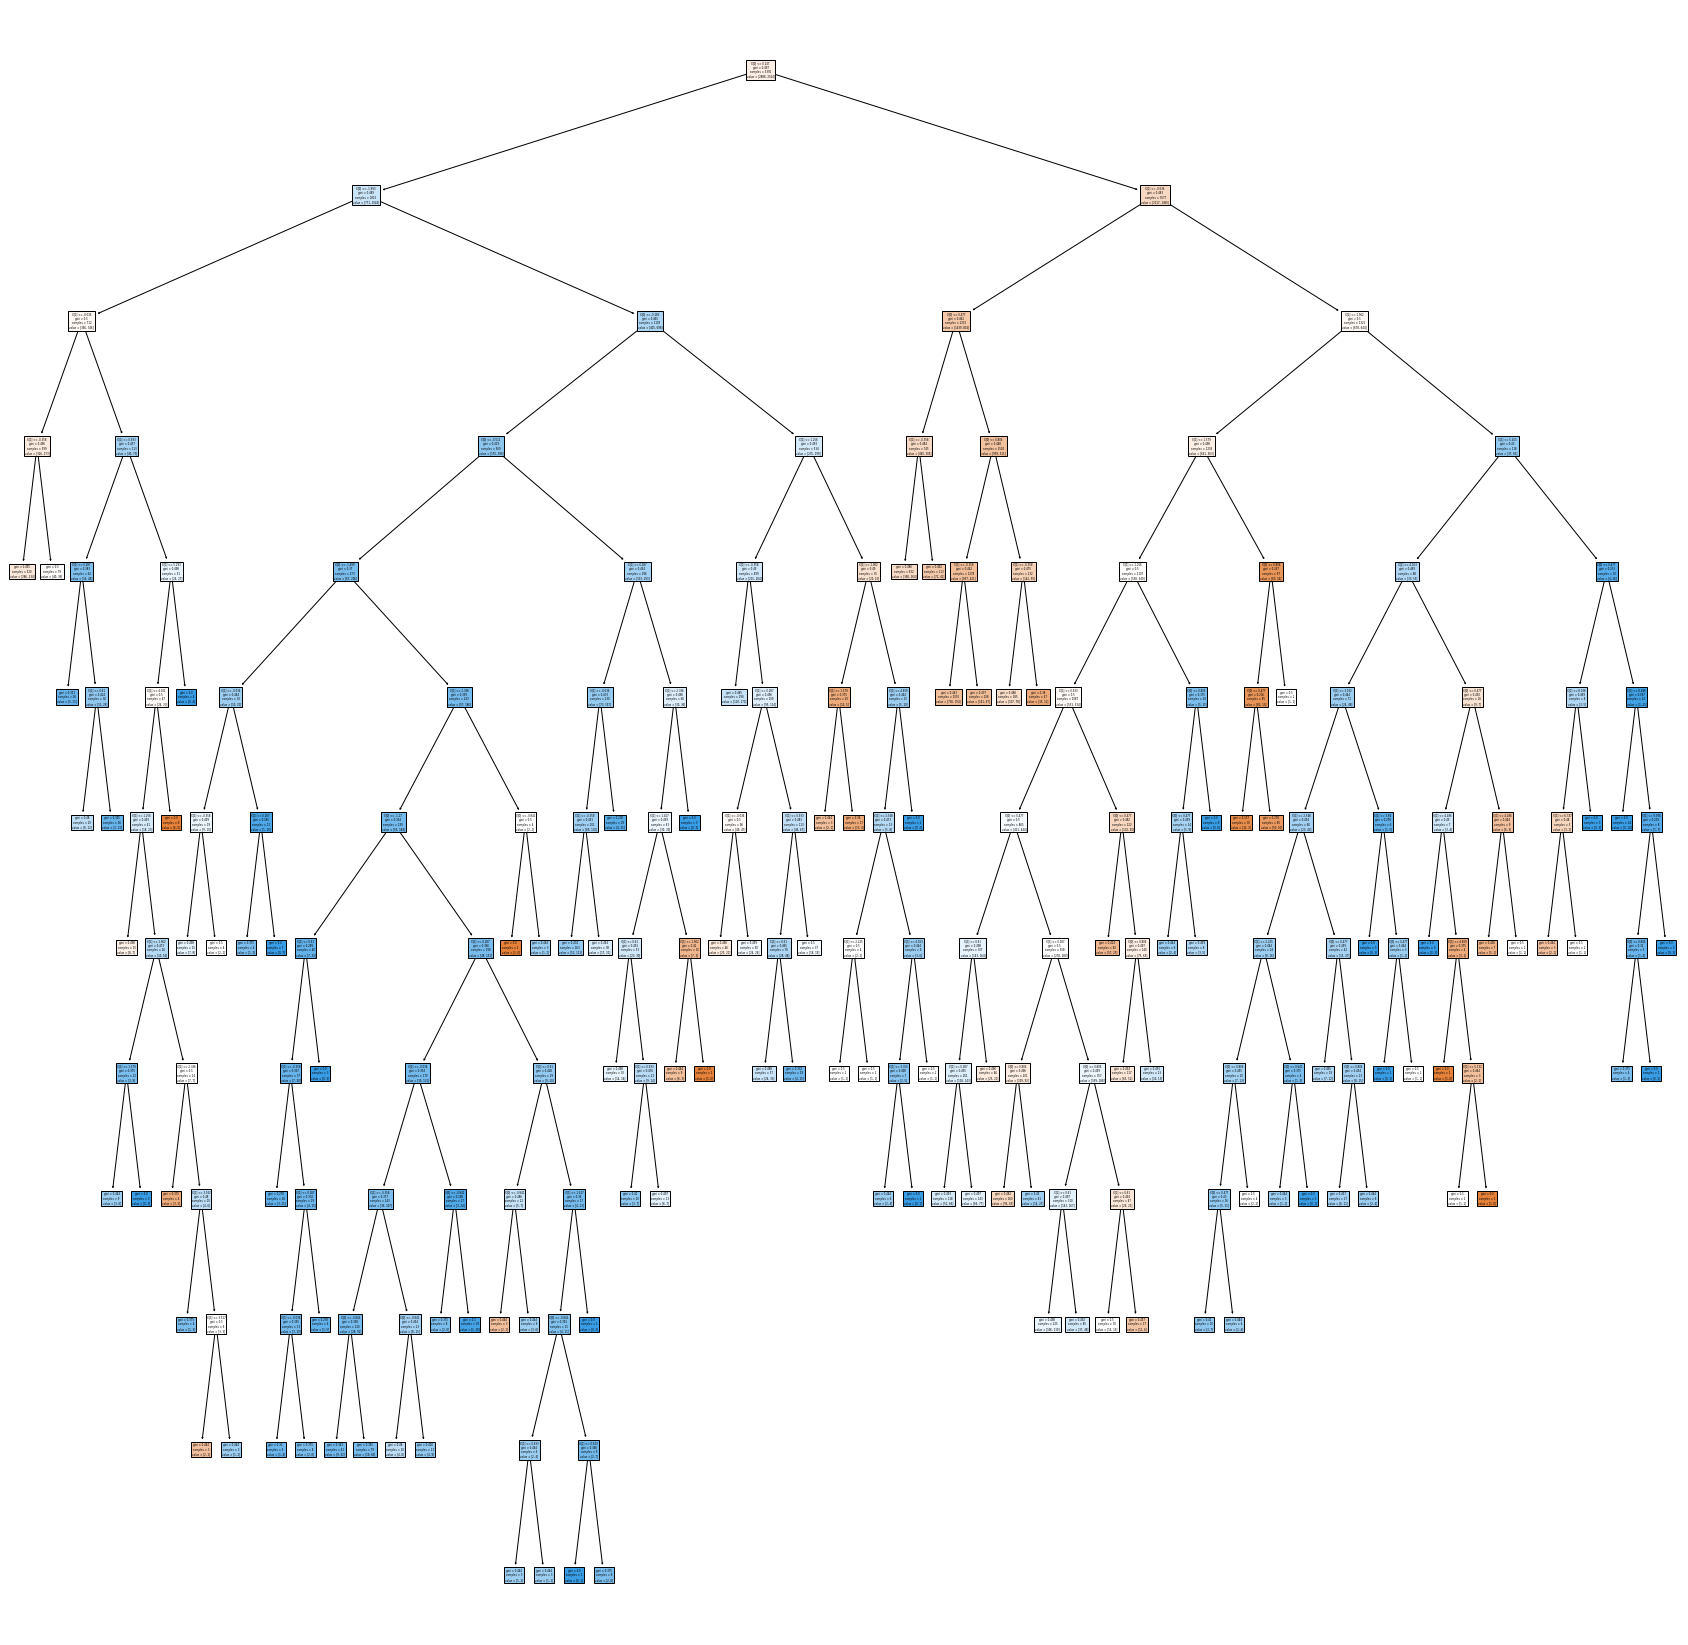

In [38]:
# Decision tree visualization
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 30))
plot_tree(dt_orbit1, filled=True)
plt.show()

In [39]:
rfc_users1 = RandomForestClassifier()
dt_users1 = DecisionTreeClassifier()

rfc_users1.fit(X_train, y_users_train)
dt_users1.fit(X_train, y_users_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Text(0.5, 1.0, 'Decision tree')

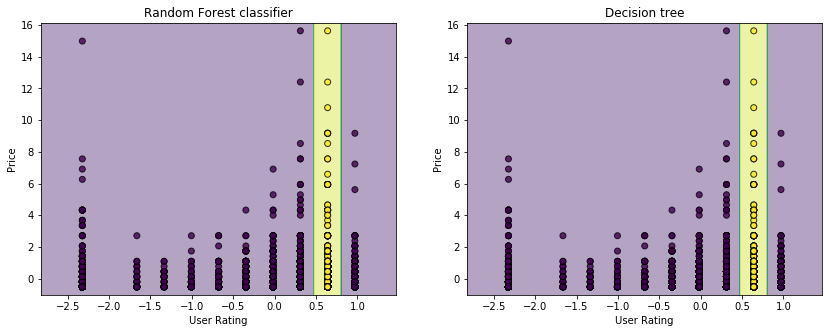

In [40]:
fig = plt.figure(figsize=(14, 5))

fig.add_subplot(121)
plot_decision_boundaries(X_train, y_users_train, 
                         feature_names, le_users.classes_, rfc_users1)
plt.title('Random Forest classifier')

fig.add_subplot(122)
plot_decision_boundaries(X_train, y_users_train, 
                         feature_names, le_users.classes_, dt_users1)
plt.title('Decision tree')

In [41]:
print('Random Forest Classifier')
print('-------------------')
print('Training set:')
print_metrics(y_users_train, rfc_users1.predict(X_train))

print()
print('Test set:')
print_metrics(y_users_test, rfc_users1.predict(X_test))

Random Forest Classifier
-------------------
Training set:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1-score : 1.00

Test set:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1-score : 1.00


In [42]:
 print('Decision tree')
print('-------------------')
print('Training set:')
print_metrics(y_users_train, dt_users1.predict(X_train))

print()
print('Test set:')
print_metrics(y_users_test, dt_users1.predict(X_test))

Decision tree
-------------------
Training set:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1-score : 1.00

Test set:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1-score : 1.00


Text(0.5, 1.0, 'Decision tree')

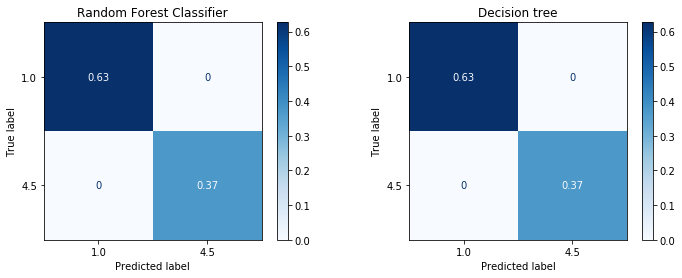

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_confusion_matrix(rfc_users1, X_test, y_users_test,
                      cmap=plt.cm.Blues, normalize='all', 
                      display_labels=le_users.classes_, ax=ax1)
ax1.set_title('Random Forest Classifier')

plot_confusion_matrix(dt_users1, X_test, y_users_test,
                      cmap=plt.cm.Blues, normalize='all', 
                      display_labels=le_users.classes_, ax=ax2)
ax2.set_title('Decision tree')

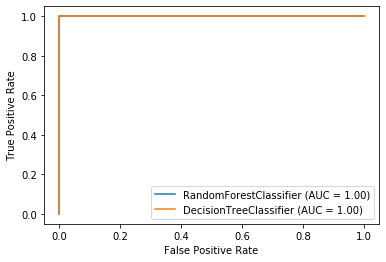

In [44]:
roc = plot_roc_curve(rfc_users1, X_test, y_users_test)
plot_roc_curve(dt_users1, X_test, y_users_test, ax=roc.ax_)

In [45]:
X2 = df_filtered[[
    'price', 'user_rating',
    'rating_count_tot']].values
X2 = StandardScaler().fit_transform(X2)
X2_train, X2_test = X2[train_indexes], X2[test_indexes]

X3 = df_filtered[[
    'price', 'user_rating',
    'rating_count_tot','sup_devices.num', 'user_rating_ver',]].values
X3 = StandardScaler().fit_transform(X3)
X3_train, X3_test = X3[train_indexes], X3[test_indexes]

In [46]:
rfc_users2 = RandomForestClassifier()
rfc_users3 = RandomForestClassifier()

rfc_users2.fit(X2_train, y_users_train)
rfc_users3.fit(X3_train, y_users_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
print('Random Forest Classifier (3 features)')
print('-------------------')
print('Training set:')
print_metrics(y_users_train, rfc_users2.predict(X2_train))

print()
print('Test set:')
print_metrics(y_users_test, rfc_users2.predict(X2_test))

Random Forest Classifier (3 features)
-------------------
Training set:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1-score : 1.00

Test set:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1-score : 1.00


In [48]:
print('Random Forest Classifier (5 features)')
print('-------------------')
print('Training set:')
print_metrics(y_users_train, rfc_users3.predict(X3_train))

print()
print('Test set:')
print_metrics(y_users_test, rfc_users3.predict(X3_test))

Random Forest Classifier (5 features)
-------------------
Training set:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1-score : 1.00

Test set:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1-score : 1.00


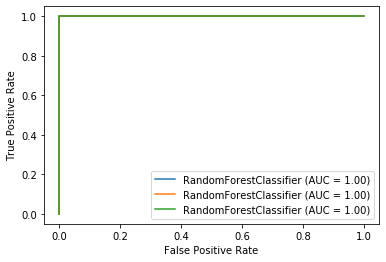

In [49]:
 roc = plot_roc_curve(rfc_users1, X_test, y_users_test)
plot_roc_curve(rfc_users2, X2_test, y_users_test, ax=roc.ax_)
plot_roc_curve(rfc_users3, X3_test, y_users_test, ax=roc.ax_)

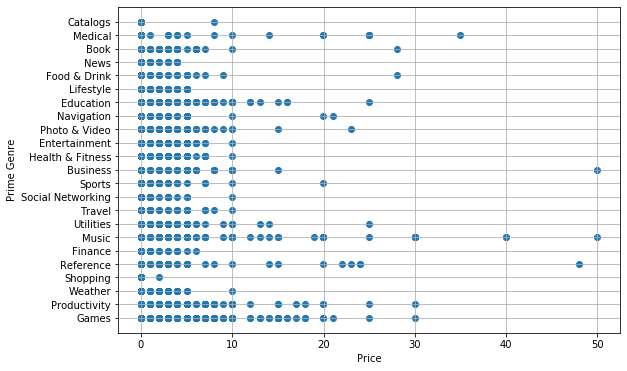

In [50]:
plt.figure(figsize=(9, 6))
plt.scatter(df['price'], df['prime_genre'])
plt.xlabel('Price')
plt.ylabel('Prime Genre')
plt.grid()

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df[['price', 'user_rating']].values
X = scaler.fit_transform(X)

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

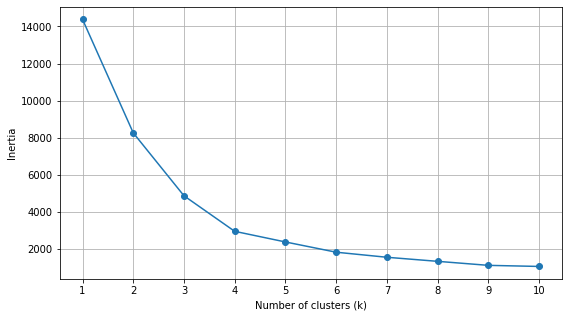

In [53]:
inertia_scores = []
k_values = list(range(1, 10 + 1))
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    y_pred = kmeans.fit_predict(X)
    inertia_scores.append(kmeans.inertia_)
    
plt.figure(figsize=(9, 5))
plt.plot(k_values, inertia_scores, marker='o')
plt.xticks(k_values)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid()

C:\Users\Pasquale Siciliano\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


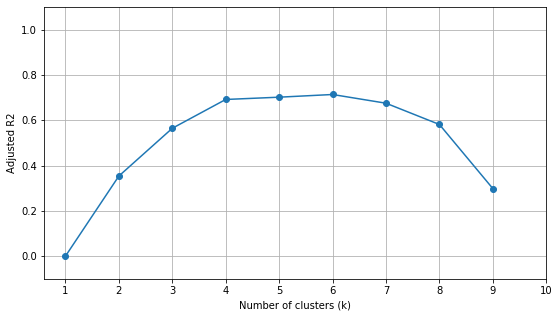

In [54]:
# Adjusted R2
n = max(k_values)
adjusted_r2_scores = [
    1 - ((inertia * (n - 1)) / (inertia_scores[0] * (n - k)))
    for inertia, k in zip(inertia_scores, k_values)
]

plt.figure(figsize=(9, 5))
plt.plot(k_values, adjusted_r2_scores, marker='o')
plt.xticks(k_values)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Adjusted R2')
plt.ylim([-0.1, 1.1])
plt.grid()

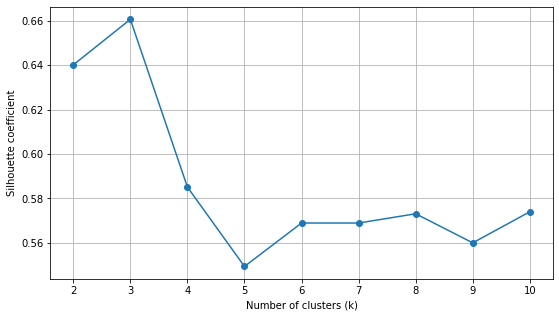

In [55]:
silhouette_scores = []
k_values = list(range(2, 10 + 1))
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    y_pred = kmeans.fit_predict(X)
    score = silhouette_score(X, y_pred)
    silhouette_scores.append(score)

    
plt.figure(figsize=(9, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xticks(k_values)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette coefficient')
plt.grid()

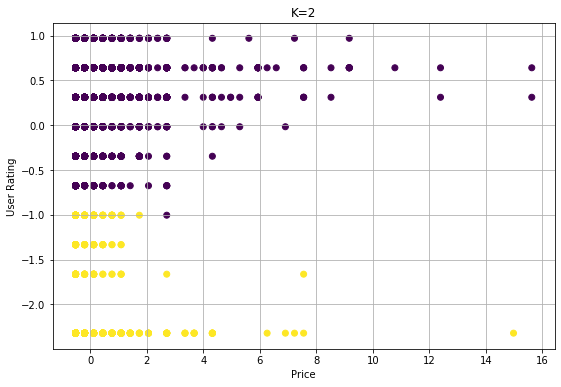

In [56]:
kmeans_2 = KMeans(n_clusters=2)
kmeans_2_pred = kmeans_2.fit_predict(X)

plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_2_pred)
plt.xlabel('Price')
plt.ylabel('User Rating')
plt.title('K=2')
plt.grid()

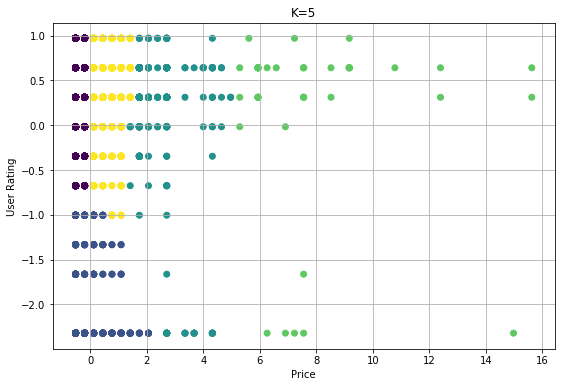

In [57]:
kmeans_5 = KMeans(n_clusters=5, random_state=12)
kmeans_5_pred = kmeans_5.fit_predict(X)

plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_5_pred)
plt.xlabel('Price')
plt.ylabel('User Rating')
plt.title('K=5')
plt.grid()

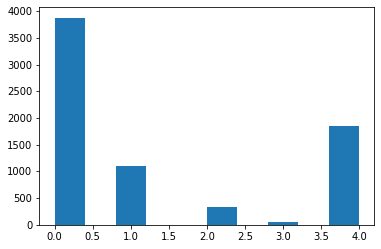

In [58]:
plt.figure()
plt.hist(kmeans_5_pred)
plt.show()

In [59]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

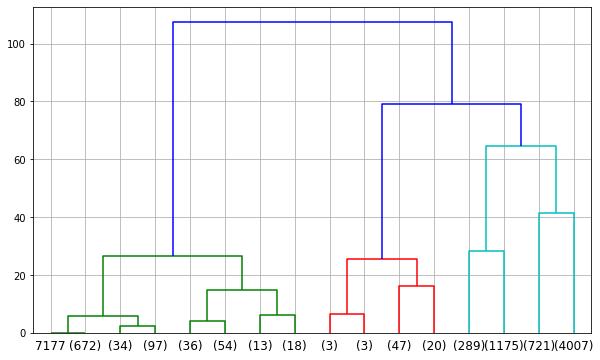

In [60]:
from sklearn.cluster import AgglomerativeClustering

hc0 = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hc0.fit(X)

plt.figure(figsize=(10, 6))
plot_dendrogram(hc0, truncate_mode='level', p=3)
plt.grid()

In [61]:
hc = AgglomerativeClustering(distance_threshold=25, n_clusters=None)
hc_pred = hc.fit_predict(X)

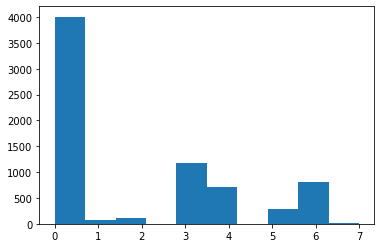

In [62]:
plt.figure()
plt.hist(hc_pred)
plt.show()

No handles with labels found to put in legend.


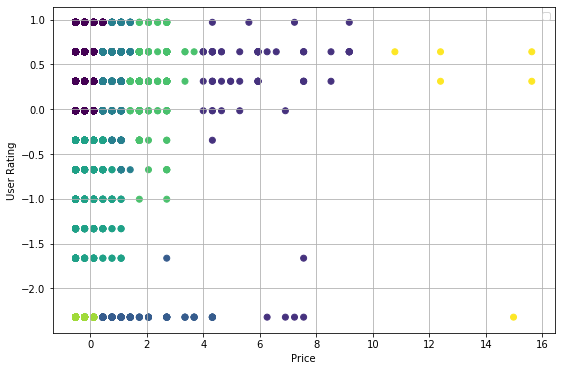

In [63]:
plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:, 1], c=hc_pred)
plt.xlabel('Price')
plt.ylabel('User Rating')
plt.legend()
plt.grid()

In [64]:
#start with deep learning task

In [65]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df['prg'] = df['prime_genre'].apply(lambda x: x if x == 'Games' else 'others')

filter1 = (df['price'].notnull())
df_filtered = df[filter1].reset_index()

# Train/test/validation split: 60%/20%/20%
train_indexes, test_indexes = train_test_split(df_filtered.index, test_size=0.2, random_state=100)
train_indexes, val_indexes = train_test_split(train_indexes, test_size=0.25, random_state=101)
X = df_filtered[[
    'price', 'user_rating',
    'rating_count_tot','sup_devices.num', 'user_rating_ver',]].values
X = StandardScaler().fit_transform(X)
X_train, X_test, X_val = X[train_indexes], X[test_indexes], X[val_indexes]

le_users = LabelEncoder()
y_users = le_users.fit_transform(df_filtered['prg'])
y_train, y_test, y_val = y_users[train_indexes], y_users[test_indexes], y_users[val_indexes]

In [66]:
def plot_history(history, metric):
    plt.figure(figsize=(10, 5))
    plt.plot(history[metric], label='training')
    plt.plot(history[f'val_{metric}'], label='validation')
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

In [67]:
ks1 = keras.Sequential([
    keras.layers.Dense(10, activation='sigmoid', input_shape=(6,5)),
    keras.layers.Dense(1, activation='sigmoid')
])
#I increase the learning rate because I saw that the accuracy will slighlty increase than lowest values of rate
ks1.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.2), 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [68]:
result1 = ks1.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=100)

Epoch 1/100
135/135 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.5783 - val_loss: 0.6603 - val_accuracy: 0.6314
Epoch 2/100
135/135 [==============================] - 0s 1ms/step - loss: 0.6576 - accuracy: 0.6085 - val_loss: 0.6483 - val_accuracy: 0.6412
Epoch 3/100
135/135 [==============================] - 0s 990us/step - loss: 0.6517 - accuracy: 0.6134 - val_loss: 0.6379 - val_accuracy: 0.6328
Epoch 4/100
135/135 [==============================] - 0s 960us/step - loss: 0.6450 - accuracy: 0.6191 - val_loss: 0.6360 - val_accuracy: 0.6488
Epoch 5/100
135/135 [==============================] - 0s 968us/step - loss: 0.6401 - accuracy: 0.6254 - val_loss: 0.6264 - val_accuracy: 0.6565
Epoch 6/100
135/135 [==============================] - 0s 953us/step - loss: 0.6335 - accuracy: 0.6414 - val_loss: 0.6216 - val_accuracy: 0.6419
Epoch 7/100
135/135 [==============================] - 0s 960us/step - loss: 0.6284 - accuracy: 0.6386 - val_loss: 0.6161 - val_accura

135/135 [==============================] - 0s 975us/step - loss: 0.5811 - accuracy: 0.6873 - val_loss: 0.5798 - val_accuracy: 0.6996
Epoch 53/100
135/135 [==============================] - 0s 997us/step - loss: 0.5802 - accuracy: 0.6889 - val_loss: 0.5783 - val_accuracy: 0.7017
Epoch 54/100
135/135 [==============================] - 0s 990us/step - loss: 0.5797 - accuracy: 0.6912 - val_loss: 0.5769 - val_accuracy: 0.7017
Epoch 55/100
135/135 [==============================] - 0s 968us/step - loss: 0.5785 - accuracy: 0.6919 - val_loss: 0.5758 - val_accuracy: 0.7024
Epoch 56/100
135/135 [==============================] - 0s 990us/step - loss: 0.5781 - accuracy: 0.6954 - val_loss: 0.5755 - val_accuracy: 0.7017
Epoch 57/100
135/135 [==============================] - 0s 997us/step - loss: 0.5767 - accuracy: 0.6912 - val_loss: 0.5756 - val_accuracy: 0.7079
Epoch 58/100
135/135 [==============================] - 0s 990us/step - loss: 0.5755 - accuracy: 0.7010 - val_loss: 0.5780 - val_accuracy

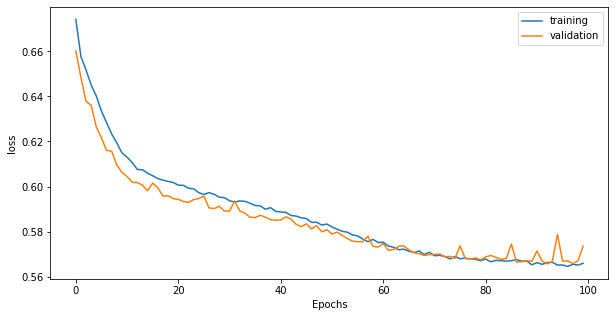

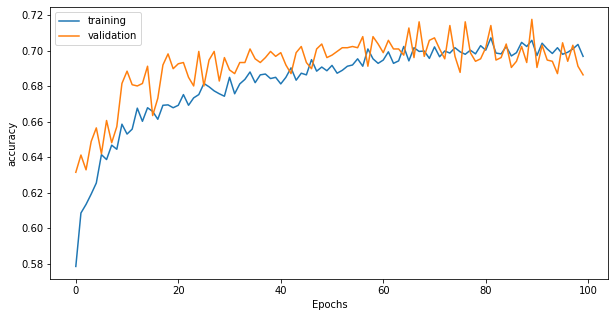

In [69]:
plot_history(result1.history, 'loss')
plot_history(result1.history, 'accuracy')

In [70]:
ks2 = keras.Sequential([
    keras.layers.Dense(25, activation='relu', input_shape=(6,5)),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


ks2.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.2), 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [71]:
#increasing the epochs to 200
result2 = ks2.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val),
    epochs=200)

Epoch 1/200
135/135 [==============================] - 0s 1ms/step - loss: 0.6400 - accuracy: 0.6266 - val_loss: 0.6160 - val_accuracy: 0.6704
Epoch 2/200
135/135 [==============================] - 0s 1ms/step - loss: 0.6088 - accuracy: 0.6720 - val_loss: 0.5966 - val_accuracy: 0.6801
Epoch 3/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5971 - accuracy: 0.6759 - val_loss: 0.5834 - val_accuracy: 0.6885
Epoch 4/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5935 - accuracy: 0.6824 - val_loss: 0.5770 - val_accuracy: 0.7031
Epoch 5/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5864 - accuracy: 0.6901 - val_loss: 0.5716 - val_accuracy: 0.6996
Epoch 6/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5813 - accuracy: 0.6929 - val_loss: 0.5846 - val_accuracy: 0.6892
Epoch 7/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5774 - accuracy: 0.6938 - val_loss: 0.5674 - val_accuracy: 0.7003

135/135 [==============================] - 0s 990us/step - loss: 0.5476 - accuracy: 0.7204 - val_loss: 0.5566 - val_accuracy: 0.7197
Epoch 54/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5484 - accuracy: 0.7214 - val_loss: 0.5576 - val_accuracy: 0.7135
Epoch 55/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5454 - accuracy: 0.7207 - val_loss: 0.5713 - val_accuracy: 0.7031
Epoch 56/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5459 - accuracy: 0.7258 - val_loss: 0.5709 - val_accuracy: 0.6947
Epoch 57/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5466 - accuracy: 0.7188 - val_loss: 0.5754 - val_accuracy: 0.7031
Epoch 58/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5470 - accuracy: 0.7184 - val_loss: 0.5642 - val_accuracy: 0.7086
Epoch 59/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5490 - accuracy: 0.7255 - val_loss: 0.5687 - val_accuracy: 0.6996
Epo

Epoch 110/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5343 - accuracy: 0.7339 - val_loss: 0.5721 - val_accuracy: 0.7051
Epoch 111/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5382 - accuracy: 0.7357 - val_loss: 0.5753 - val_accuracy: 0.7058
Epoch 112/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5348 - accuracy: 0.7376 - val_loss: 0.5667 - val_accuracy: 0.7100
Epoch 113/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5383 - accuracy: 0.7339 - val_loss: 0.5755 - val_accuracy: 0.6961
Epoch 114/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5366 - accuracy: 0.7274 - val_loss: 0.5747 - val_accuracy: 0.6996
Epoch 115/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5355 - accuracy: 0.7293 - val_loss: 0.5742 - val_accuracy: 0.7051
Epoch 116/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5338 - accuracy: 0.7353 - val_loss: 0.5803 - val_ac

135/135 [==============================] - 0s 1ms/step - loss: 0.5278 - accuracy: 0.7371 - val_loss: 0.5692 - val_accuracy: 0.7072
Epoch 167/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5279 - accuracy: 0.7418 - val_loss: 0.5730 - val_accuracy: 0.6954
Epoch 168/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5281 - accuracy: 0.7418 - val_loss: 0.5774 - val_accuracy: 0.6905
Epoch 169/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5267 - accuracy: 0.7348 - val_loss: 0.5723 - val_accuracy: 0.6961
Epoch 170/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5270 - accuracy: 0.7364 - val_loss: 0.5755 - val_accuracy: 0.6996
Epoch 171/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5264 - accuracy: 0.7404 - val_loss: 0.5802 - val_accuracy: 0.7045
Epoch 172/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5280 - accuracy: 0.7330 - val_loss: 0.5671 - val_accuracy: 0.6996

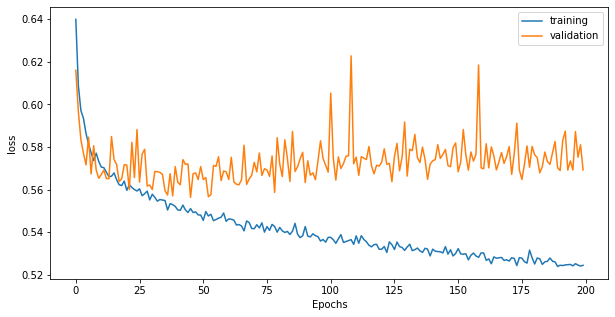

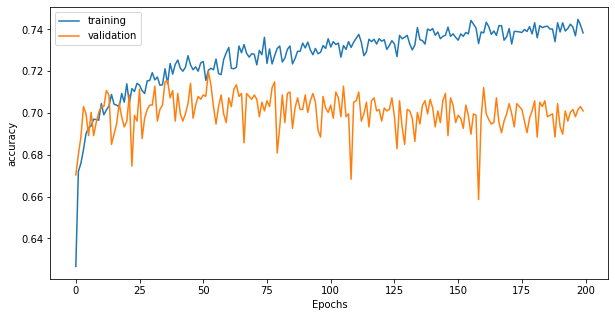

In [72]:
plot_history(result2.history, 'loss')
plot_history(result2.history, 'accuracy')

In [73]:
#try to increase the input shape from 6 to 12 to see the changes
ks3 = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=(12,5)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ks3.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [74]:
#here I increase the numbers of epoches to 500
result3 = ks3.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val),
    epochs=500)

Epoch 1/500
135/135 [==============================] - 0s 2ms/step - loss: 0.6289 - accuracy: 0.6467 - val_loss: 0.5971 - val_accuracy: 0.6947
Epoch 2/500
135/135 [==============================] - 0s 1ms/step - loss: 0.5987 - accuracy: 0.6843 - val_loss: 0.5889 - val_accuracy: 0.6794
Epoch 3/500
135/135 [==============================] - 0s 1ms/step - loss: 0.5930 - accuracy: 0.6827 - val_loss: 0.5763 - val_accuracy: 0.7031
Epoch 4/500
135/135 [==============================] - 0s 1ms/step - loss: 0.5811 - accuracy: 0.6963 - val_loss: 0.5738 - val_accuracy: 0.6954
Epoch 5/500
135/135 [==============================] - 0s 1ms/step - loss: 0.5769 - accuracy: 0.6924 - val_loss: 0.5721 - val_accuracy: 0.6968
Epoch 6/500
135/135 [==============================] - 0s 1ms/step - loss: 0.5737 - accuracy: 0.7024 - val_loss: 0.5702 - val_accuracy: 0.6933
Epoch 7/500
135/135 [==============================] - 0s 1ms/step - loss: 0.5697 - accuracy: 0.7035 - val_loss: 0.5638 - val_accuracy: 0.7065

135/135 [==============================] - 0s 1ms/step - loss: 0.5316 - accuracy: 0.7323 - val_loss: 0.5718 - val_accuracy: 0.7024
Epoch 54/500
135/135 [==============================] - 0s 1ms/step - loss: 0.5299 - accuracy: 0.7383 - val_loss: 0.5713 - val_accuracy: 0.7086
Epoch 55/500
135/135 [==============================] - 0s 1ms/step - loss: 0.5303 - accuracy: 0.7371 - val_loss: 0.5658 - val_accuracy: 0.7128
Epoch 56/500
135/135 [==============================] - 0s 1ms/step - loss: 0.5305 - accuracy: 0.7367 - val_loss: 0.5673 - val_accuracy: 0.7072
Epoch 57/500
135/135 [==============================] - 0s 1ms/step - loss: 0.5281 - accuracy: 0.7376 - val_loss: 0.5764 - val_accuracy: 0.7003
Epoch 58/500
135/135 [==============================] - 0s 1ms/step - loss: 0.5284 - accuracy: 0.7353 - val_loss: 0.5782 - val_accuracy: 0.6968
Epoch 59/500
135/135 [==============================] - 0s 1ms/step - loss: 0.5337 - accuracy: 0.7353 - val_loss: 0.5732 - val_accuracy: 0.7058
Epoch

Epoch 110/500
135/135 [==============================] - 0s 1ms/step - loss: 0.5143 - accuracy: 0.7436 - val_loss: 0.5722 - val_accuracy: 0.7170
Epoch 111/500
135/135 [==============================] - 0s 1ms/step - loss: 0.5150 - accuracy: 0.7483 - val_loss: 0.5766 - val_accuracy: 0.7079
Epoch 112/500
135/135 [==============================] - 0s 1ms/step - loss: 0.5169 - accuracy: 0.7459 - val_loss: 0.5805 - val_accuracy: 0.7024
Epoch 113/500
135/135 [==============================] - 0s 1ms/step - loss: 0.5161 - accuracy: 0.7420 - val_loss: 0.5820 - val_accuracy: 0.6989
Epoch 114/500
135/135 [==============================] - 0s 1ms/step - loss: 0.5153 - accuracy: 0.7480 - val_loss: 0.5783 - val_accuracy: 0.7024
Epoch 115/500
135/135 [==============================] - 0s 1ms/step - loss: 0.5140 - accuracy: 0.7457 - val_loss: 0.5774 - val_accuracy: 0.7024
Epoch 116/500
135/135 [==============================] - 0s 1ms/step - loss: 0.5143 - accuracy: 0.7406 - val_loss: 0.5842 - val_ac

135/135 [==============================] - 0s 1ms/step - loss: 0.5035 - accuracy: 0.7513 - val_loss: 0.5855 - val_accuracy: 0.6989
Epoch 167/500
135/135 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.7575 - val_loss: 0.5816 - val_accuracy: 0.7058
Epoch 168/500
135/135 [==============================] - 0s 1ms/step - loss: 0.5014 - accuracy: 0.7559 - val_loss: 0.5877 - val_accuracy: 0.7086
Epoch 169/500
135/135 [==============================] - 0s 1ms/step - loss: 0.5040 - accuracy: 0.7485 - val_loss: 0.5899 - val_accuracy: 0.6996
Epoch 170/500
135/135 [==============================] - 0s 1ms/step - loss: 0.5015 - accuracy: 0.7492 - val_loss: 0.5869 - val_accuracy: 0.7038
Epoch 171/500
135/135 [==============================] - 0s 1ms/step - loss: 0.5047 - accuracy: 0.7524 - val_loss: 0.5891 - val_accuracy: 0.7051
Epoch 172/500
135/135 [==============================] - 0s 1ms/step - loss: 0.5018 - accuracy: 0.7538 - val_loss: 0.5839 - val_accuracy: 0.7086

135/135 [==============================] - 0s 1ms/step - loss: 0.4936 - accuracy: 0.7582 - val_loss: 0.5891 - val_accuracy: 0.7072
Epoch 223/500
135/135 [==============================] - ETA: 0s - loss: 0.4969 - accuracy: 0.75 - 0s 1ms/step - loss: 0.4920 - accuracy: 0.7559 - val_loss: 0.5945 - val_accuracy: 0.7079
Epoch 224/500
135/135 [==============================] - 0s 2ms/step - loss: 0.4883 - accuracy: 0.7573 - val_loss: 0.5939 - val_accuracy: 0.7038
Epoch 225/500
135/135 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.7573 - val_loss: 0.5996 - val_accuracy: 0.6947
Epoch 226/500
135/135 [==============================] - 0s 1ms/step - loss: 0.4897 - accuracy: 0.7585 - val_loss: 0.5961 - val_accuracy: 0.7051
Epoch 227/500
135/135 [==============================] - 0s 1ms/step - loss: 0.4944 - accuracy: 0.7580 - val_loss: 0.5927 - val_accuracy: 0.7045
Epoch 228/500
135/135 [==============================] - 0s 1ms/step - loss: 0.4877 - accuracy: 0.7610

135/135 [==============================] - 0s 1ms/step - loss: 0.4823 - accuracy: 0.7612 - val_loss: 0.6013 - val_accuracy: 0.7017
Epoch 279/500
135/135 [==============================] - 0s 1ms/step - loss: 0.4818 - accuracy: 0.7640 - val_loss: 0.6052 - val_accuracy: 0.6947
Epoch 280/500
135/135 [==============================] - 0s 1ms/step - loss: 0.4820 - accuracy: 0.7633 - val_loss: 0.6090 - val_accuracy: 0.7051
Epoch 281/500
135/135 [==============================] - 0s 1ms/step - loss: 0.4816 - accuracy: 0.7617 - val_loss: 0.6126 - val_accuracy: 0.6996
Epoch 282/500
135/135 [==============================] - 0s 1ms/step - loss: 0.4797 - accuracy: 0.7659 - val_loss: 0.6160 - val_accuracy: 0.6968
Epoch 283/500
135/135 [==============================] - 0s 1ms/step - loss: 0.4798 - accuracy: 0.7640 - val_loss: 0.6043 - val_accuracy: 0.7010
Epoch 284/500
135/135 [==============================] - 0s 1ms/step - loss: 0.4787 - accuracy: 0.7633 - val_loss: 0.6025 - val_accuracy: 0.6989

135/135 [==============================] - 0s 1ms/step - loss: 0.4696 - accuracy: 0.7721 - val_loss: 0.6200 - val_accuracy: 0.7017
Epoch 335/500
135/135 [==============================] - 0s 1ms/step - loss: 0.4680 - accuracy: 0.7728 - val_loss: 0.6138 - val_accuracy: 0.6989
Epoch 336/500
135/135 [==============================] - 0s 1ms/step - loss: 0.4709 - accuracy: 0.7675 - val_loss: 0.6190 - val_accuracy: 0.6926
Epoch 337/500
135/135 [==============================] - 0s 1ms/step - loss: 0.4705 - accuracy: 0.7684 - val_loss: 0.6149 - val_accuracy: 0.7003
Epoch 338/500
135/135 [==============================] - 0s 1ms/step - loss: 0.4708 - accuracy: 0.7668 - val_loss: 0.6212 - val_accuracy: 0.6975
Epoch 339/500
135/135 [==============================] - 0s 1ms/step - loss: 0.4713 - accuracy: 0.7666 - val_loss: 0.6172 - val_accuracy: 0.7024
Epoch 340/500
135/135 [==============================] - 0s 1ms/step - loss: 0.4682 - accuracy: 0.7694 - val_loss: 0.6184 - val_accuracy: 0.6926

135/135 [==============================] - 0s 1ms/step - loss: 0.4610 - accuracy: 0.7701 - val_loss: 0.6313 - val_accuracy: 0.6982
Epoch 391/500
135/135 [==============================] - 0s 1ms/step - loss: 0.4590 - accuracy: 0.7707 - val_loss: 0.6393 - val_accuracy: 0.6926
Epoch 392/500
135/135 [==============================] - 0s 1ms/step - loss: 0.4621 - accuracy: 0.7738 - val_loss: 0.6332 - val_accuracy: 0.6954
Epoch 393/500
135/135 [==============================] - 0s 1ms/step - loss: 0.4621 - accuracy: 0.7733 - val_loss: 0.6424 - val_accuracy: 0.6961
Epoch 394/500
135/135 [==============================] - 0s 1ms/step - loss: 0.4652 - accuracy: 0.7689 - val_loss: 0.6391 - val_accuracy: 0.7003
Epoch 395/500
135/135 [==============================] - 0s 1ms/step - loss: 0.4611 - accuracy: 0.7731 - val_loss: 0.6310 - val_accuracy: 0.6892
Epoch 396/500
135/135 [==============================] - 0s 1ms/step - loss: 0.4633 - accuracy: 0.7701 - val_loss: 0.6259 - val_accuracy: 0.7010

135/135 [==============================] - 0s 1ms/step - loss: 0.4581 - accuracy: 0.7761 - val_loss: 0.6366 - val_accuracy: 0.7079
Epoch 447/500
135/135 [==============================] - 0s 1ms/step - loss: 0.4575 - accuracy: 0.7738 - val_loss: 0.6447 - val_accuracy: 0.6996
Epoch 448/500
135/135 [==============================] - 0s 1ms/step - loss: 0.4594 - accuracy: 0.7800 - val_loss: 0.6428 - val_accuracy: 0.6898
Epoch 449/500
135/135 [==============================] - 0s 1ms/step - loss: 0.4530 - accuracy: 0.7738 - val_loss: 0.6519 - val_accuracy: 0.7024
Epoch 450/500
135/135 [==============================] - 0s 1ms/step - loss: 0.4556 - accuracy: 0.7717 - val_loss: 0.6526 - val_accuracy: 0.7038
Epoch 451/500
135/135 [==============================] - 0s 1ms/step - loss: 0.4513 - accuracy: 0.7775 - val_loss: 0.6492 - val_accuracy: 0.6940
Epoch 452/500
135/135 [==============================] - 0s 1ms/step - loss: 0.4529 - accuracy: 0.7742 - val_loss: 0.6544 - val_accuracy: 0.6898

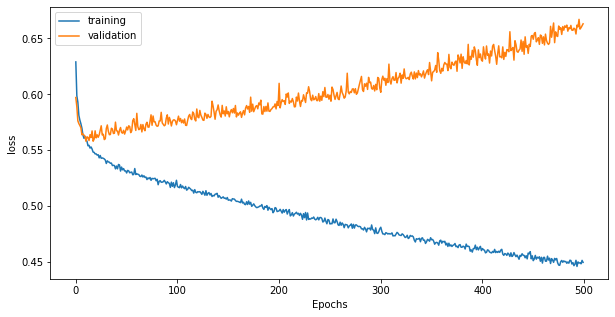

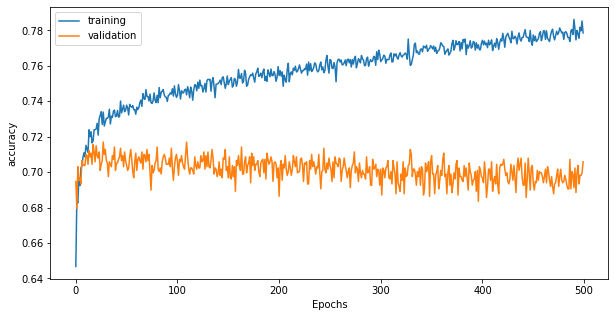

In [75]:
plot_history(result3.history, 'loss')
plot_history(result3.history, 'accuracy')

In [76]:
ks1.evaluate(X_test, y_test)
ks2.evaluate(X_test, y_test)
ks3.evaluate(X_test, y_test)

45/45 [==============================] - 0s 731us/step - loss: 0.6374 - accuracy: 0.7191


[0.6374300122261047, 0.7190542221069336]

In [77]:
print(f'Model #1: {ks1.count_params()}')
print(f'Model #2: {ks2.count_params()}')
print(f'Model #3: {ks3.count_params()}')

Model #1: 71
Model #2: 826
Model #3: 10801


In [78]:
ks3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 12, 100)           600       
_________________________________________________________________
dense_6 (Dense)              (None, 12, 100)           10100     
_________________________________________________________________
dense_7 (Dense)              (None, 12, 1)             101       
Total params: 10,801
Trainable params: 10,801
Non-trainable params: 0
_________________________________________________________________


In [79]:
#try with another model, increasing the input shapet from 6 to 12 to see the changes
ks4 = keras.Sequential([
    keras.layers.Dense(400, activation='relu', input_shape=(12,5)),
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ks4.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [80]:
#here I increase the epochs to 1000
result4 = ks4.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val),
    epochs=1000)

Epoch 1/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.6241 - accuracy: 0.6511 - val_loss: 0.5897 - val_accuracy: 0.6871
Epoch 2/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.6755 - val_loss: 0.5787 - val_accuracy: 0.6954
Epoch 3/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.5808 - accuracy: 0.6898 - val_loss: 0.5690 - val_accuracy: 0.7017
Epoch 4/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.5761 - accuracy: 0.6998 - val_loss: 0.5752 - val_accuracy: 0.6961
Epoch 5/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.5729 - accuracy: 0.6987 - val_loss: 0.5671 - val_accuracy: 0.6996
Epoch 6/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.5686 - accuracy: 0.7058 - val_loss: 0.5748 - val_accuracy: 0.7058
Epoch 7/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.5657 - accuracy: 0.7091 - val_loss: 0.5657 - val_accuracy:

Epoch 53/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.5183 - accuracy: 0.7434 - val_loss: 0.5817 - val_accuracy: 0.7024
Epoch 54/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.5159 - accuracy: 0.7411 - val_loss: 0.5721 - val_accuracy: 0.7093
Epoch 55/1000
135/135 [==============================] - 0s 3ms/step - loss: 0.5176 - accuracy: 0.7452 - val_loss: 0.5740 - val_accuracy: 0.7072
Epoch 56/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.5153 - accuracy: 0.7457 - val_loss: 0.5866 - val_accuracy: 0.6926
Epoch 57/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.7464 - val_loss: 0.5822 - val_accuracy: 0.7031
Epoch 58/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy: 0.7413 - val_loss: 0.5856 - val_accuracy: 0.7031
Epoch 59/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.5134 - accuracy: 0.7429 - val_loss: 0.5732 - val_ac

135/135 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.7626 - val_loss: 0.6110 - val_accuracy: 0.6975
Epoch 110/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.7636 - val_loss: 0.6136 - val_accuracy: 0.7003
Epoch 111/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.7610 - val_loss: 0.6095 - val_accuracy: 0.7093
Epoch 112/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.7629 - val_loss: 0.6031 - val_accuracy: 0.6996
Epoch 113/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.7638 - val_loss: 0.6053 - val_accuracy: 0.7031
Epoch 114/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4808 - accuracy: 0.7605 - val_loss: 0.6152 - val_accuracy: 0.6898
Epoch 115/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.7571 - val_loss: 0.6042 - val_accuracy: 

135/135 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.7738 - val_loss: 0.6546 - val_accuracy: 0.6892
Epoch 166/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4572 - accuracy: 0.7733 - val_loss: 0.6594 - val_accuracy: 0.6968
Epoch 167/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4538 - accuracy: 0.7726 - val_loss: 0.6672 - val_accuracy: 0.6996
Epoch 168/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.7747 - val_loss: 0.6528 - val_accuracy: 0.7017
Epoch 169/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4556 - accuracy: 0.7738 - val_loss: 0.6624 - val_accuracy: 0.7003
Epoch 170/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4533 - accuracy: 0.7756 - val_loss: 0.6557 - val_accuracy: 0.6996
Epoch 171/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.7710 - val_loss: 0.6769 - val_accuracy: 

135/135 [==============================] - 0s 2ms/step - loss: 0.4384 - accuracy: 0.7812 - val_loss: 0.7204 - val_accuracy: 0.6989
Epoch 222/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4378 - accuracy: 0.7768 - val_loss: 0.7137 - val_accuracy: 0.6996
Epoch 223/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4384 - accuracy: 0.7798 - val_loss: 0.7134 - val_accuracy: 0.6905
Epoch 224/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4343 - accuracy: 0.7835 - val_loss: 0.7188 - val_accuracy: 0.7031
Epoch 225/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4388 - accuracy: 0.7814 - val_loss: 0.7223 - val_accuracy: 0.6975
Epoch 226/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.7814 - val_loss: 0.7058 - val_accuracy: 0.6961
Epoch 227/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4389 - accuracy: 0.7800 - val_loss: 0.7055 - val_accuracy: 

Epoch 277/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.7865 - val_loss: 0.7545 - val_accuracy: 0.6926
Epoch 278/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.7856 - val_loss: 0.7667 - val_accuracy: 0.6926
Epoch 279/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.7837 - val_loss: 0.7430 - val_accuracy: 0.6961
Epoch 280/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.7860 - val_loss: 0.7630 - val_accuracy: 0.6940
Epoch 281/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4257 - accuracy: 0.7865 - val_loss: 0.7604 - val_accuracy: 0.6919
Epoch 282/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4250 - accuracy: 0.7856 - val_loss: 0.7606 - val_accuracy: 0.6961
Epoch 283/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.7874 - val_loss: 0.7538 -

135/135 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.7902 - val_loss: 0.7953 - val_accuracy: 0.6947
Epoch 334/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.7902 - val_loss: 0.7876 - val_accuracy: 0.6926
Epoch 335/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.7928 - val_loss: 0.7957 - val_accuracy: 0.6982
Epoch 336/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4161 - accuracy: 0.7923 - val_loss: 0.7992 - val_accuracy: 0.6857
Epoch 337/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.7928 - val_loss: 0.7860 - val_accuracy: 0.6968
Epoch 338/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4229 - accuracy: 0.7881 - val_loss: 0.8018 - val_accuracy: 0.6898
Epoch 339/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.7865 - val_loss: 0.7865 - val_accuracy: 

135/135 [==============================] - 0s 3ms/step - loss: 0.4079 - accuracy: 0.7932 - val_loss: 0.8239 - val_accuracy: 0.6933
Epoch 390/1000
135/135 [==============================] - 0s 3ms/step - loss: 0.4097 - accuracy: 0.7979 - val_loss: 0.8280 - val_accuracy: 0.6885
Epoch 391/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.7916 - val_loss: 0.8353 - val_accuracy: 0.6857
Epoch 392/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.7904 - val_loss: 0.8476 - val_accuracy: 0.6926
Epoch 393/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.7925 - val_loss: 0.8302 - val_accuracy: 0.6801
Epoch 394/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.7884 - val_loss: 0.8264 - val_accuracy: 0.6843
Epoch 395/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.7930 - val_loss: 0.8598 - val_accuracy: 

135/135 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.7960 - val_loss: 0.8507 - val_accuracy: 0.6933
Epoch 446/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.7930 - val_loss: 0.8517 - val_accuracy: 0.6892
Epoch 447/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.7953 - val_loss: 0.8694 - val_accuracy: 0.6822
Epoch 448/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.7939 - val_loss: 0.8586 - val_accuracy: 0.6857
Epoch 449/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.7958 - val_loss: 0.8541 - val_accuracy: 0.6912
Epoch 450/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.7944 - val_loss: 0.8546 - val_accuracy: 0.6905
Epoch 451/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.7939 - val_loss: 0.8929 - val_accuracy: 

135/135 [==============================] - 0s 2ms/step - loss: 0.3990 - accuracy: 0.7976 - val_loss: 0.8952 - val_accuracy: 0.6808
Epoch 502/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.7976 - val_loss: 0.8759 - val_accuracy: 0.6850
Epoch 503/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.8011 - val_loss: 0.8922 - val_accuracy: 0.6905
Epoch 504/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.7967 - val_loss: 0.8869 - val_accuracy: 0.6892
Epoch 505/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4012 - accuracy: 0.7921 - val_loss: 0.9025 - val_accuracy: 0.6871
Epoch 506/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.7937 - val_loss: 0.8823 - val_accuracy: 0.6905
Epoch 507/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.7993 - val_loss: 0.8820 - val_accuracy: 

135/135 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.8004 - val_loss: 0.9040 - val_accuracy: 0.6926
Epoch 558/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8057 - val_loss: 0.9227 - val_accuracy: 0.6940
Epoch 559/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.7953 - val_loss: 0.8965 - val_accuracy: 0.6898
Epoch 560/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.7990 - val_loss: 0.9032 - val_accuracy: 0.6898
Epoch 561/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3911 - accuracy: 0.8011 - val_loss: 0.8991 - val_accuracy: 0.6843
Epoch 562/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8013 - val_loss: 0.9092 - val_accuracy: 0.6940
Epoch 563/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8009 - val_loss: 0.9134 - val_accuracy: 

135/135 [==============================] - 0s 2ms/step - loss: 0.3921 - accuracy: 0.7990 - val_loss: 0.9410 - val_accuracy: 0.6871
Epoch 614/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.7976 - val_loss: 0.9259 - val_accuracy: 0.6898
Epoch 615/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8023 - val_loss: 0.9213 - val_accuracy: 0.6947
Epoch 616/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.8002 - val_loss: 0.9422 - val_accuracy: 0.6829
Epoch 617/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.8034 - val_loss: 0.9370 - val_accuracy: 0.6878
Epoch 618/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.8011 - val_loss: 0.9204 - val_accuracy: 0.6878
Epoch 619/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.8006 - val_loss: 0.9366 - val_accuracy: 

135/135 [==============================] - 0s 2ms/step - loss: 0.3875 - accuracy: 0.8044 - val_loss: 0.9329 - val_accuracy: 0.6975
Epoch 670/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3868 - accuracy: 0.8032 - val_loss: 0.9448 - val_accuracy: 0.6926
Epoch 671/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.8039 - val_loss: 0.9395 - val_accuracy: 0.6905
Epoch 672/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.8004 - val_loss: 0.9346 - val_accuracy: 0.6892
Epoch 673/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3840 - accuracy: 0.8020 - val_loss: 0.9569 - val_accuracy: 0.6926
Epoch 674/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3871 - accuracy: 0.8004 - val_loss: 0.9516 - val_accuracy: 0.6850
Epoch 675/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3849 - accuracy: 0.8018 - val_loss: 0.9637 - val_accuracy: 

135/135 [==============================] - 0s 2ms/step - loss: 0.3901 - accuracy: 0.7981 - val_loss: 0.9711 - val_accuracy: 0.6871
Epoch 726/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.8032 - val_loss: 0.9660 - val_accuracy: 0.6885
Epoch 727/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3859 - accuracy: 0.8083 - val_loss: 0.9502 - val_accuracy: 0.6843
Epoch 728/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3852 - accuracy: 0.8000 - val_loss: 0.9436 - val_accuracy: 0.6878
Epoch 729/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3804 - accuracy: 0.8041 - val_loss: 0.9864 - val_accuracy: 0.6892
Epoch 730/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8006 - val_loss: 0.9922 - val_accuracy: 0.6752
Epoch 731/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8044 - val_loss: 0.9787 - val_accuracy: 

135/135 [==============================] - 0s 2ms/step - loss: 0.3801 - accuracy: 0.8081 - val_loss: 0.9895 - val_accuracy: 0.6822
Epoch 782/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3803 - accuracy: 0.8027 - val_loss: 0.9969 - val_accuracy: 0.6822
Epoch 783/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8048 - val_loss: 0.9898 - val_accuracy: 0.6801
Epoch 784/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3853 - accuracy: 0.7997 - val_loss: 0.9874 - val_accuracy: 0.6843
Epoch 785/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3824 - accuracy: 0.8046 - val_loss: 0.9909 - val_accuracy: 0.6794
Epoch 786/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 0.8122 - val_loss: 0.9830 - val_accuracy: 0.6829
Epoch 787/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3800 - accuracy: 0.8046 - val_loss: 0.9785 - val_accuracy: 

135/135 [==============================] - 0s 2ms/step - loss: 0.3804 - accuracy: 0.8034 - val_loss: 0.9968 - val_accuracy: 0.6871
Epoch 838/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3828 - accuracy: 0.8046 - val_loss: 1.0012 - val_accuracy: 0.6829
Epoch 839/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3769 - accuracy: 0.8064 - val_loss: 0.9979 - val_accuracy: 0.6850
Epoch 840/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3764 - accuracy: 0.8044 - val_loss: 1.0188 - val_accuracy: 0.6871
Epoch 841/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3793 - accuracy: 0.8071 - val_loss: 1.0206 - val_accuracy: 0.6815
Epoch 842/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3782 - accuracy: 0.8062 - val_loss: 1.0192 - val_accuracy: 0.6857
Epoch 843/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3764 - accuracy: 0.8055 - val_loss: 1.0028 - val_accuracy: 

135/135 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 0.8051 - val_loss: 1.0317 - val_accuracy: 0.6801
Epoch 894/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8076 - val_loss: 1.0144 - val_accuracy: 0.6815
Epoch 895/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3727 - accuracy: 0.8104 - val_loss: 1.0376 - val_accuracy: 0.6745
Epoch 896/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3764 - accuracy: 0.8037 - val_loss: 1.0253 - val_accuracy: 0.6808
Epoch 897/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3832 - accuracy: 0.8055 - val_loss: 1.0306 - val_accuracy: 0.6885
Epoch 898/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3776 - accuracy: 0.8057 - val_loss: 1.0226 - val_accuracy: 0.6864
Epoch 899/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3812 - accuracy: 0.8057 - val_loss: 1.0468 - val_accuracy: 

135/135 [==============================] - 0s 2ms/step - loss: 0.3699 - accuracy: 0.8120 - val_loss: 1.0147 - val_accuracy: 0.6829
Epoch 950/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3714 - accuracy: 0.8097 - val_loss: 1.0501 - val_accuracy: 0.6843
Epoch 951/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.8085 - val_loss: 1.0436 - val_accuracy: 0.6864
Epoch 952/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3767 - accuracy: 0.8053 - val_loss: 1.0166 - val_accuracy: 0.6780
Epoch 953/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3836 - accuracy: 0.8053 - val_loss: 1.0357 - val_accuracy: 0.6864
Epoch 954/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3782 - accuracy: 0.8078 - val_loss: 1.0394 - val_accuracy: 0.6885
Epoch 955/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.3756 - accuracy: 0.8069 - val_loss: 1.0309 - val_accuracy: 

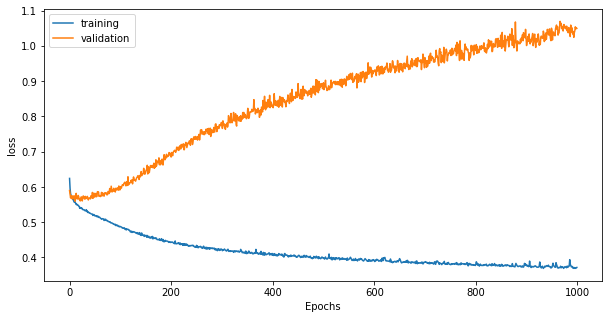

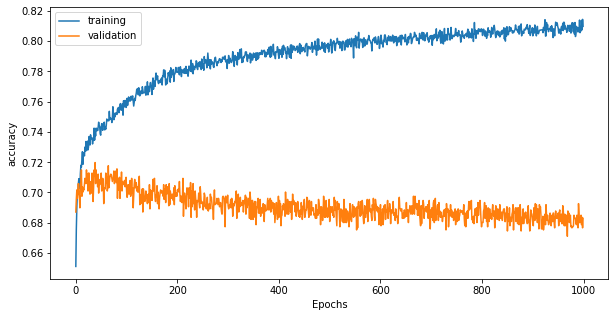

In [81]:
plot_history(result4.history, 'loss')
plot_history(result4.history, 'accuracy')

In [82]:
ks1.evaluate(X_test, y_test)
ks2.evaluate(X_test, y_test)
ks3.evaluate(X_test, y_test)
ks4.evaluate(X_test, y_test)

45/45 [==============================] - 0s 820us/step - loss: 1.0592 - accuracy: 0.6912


[1.0591986179351807, 0.6912378072738647]

In [83]:
#as we can see from the result, the best model is the ks2 because of the accuracy is the highest
# and the loss is the lowest

In [84]:
print(f'Model #1: {ks1.count_params()}')
print(f'Model #2: {ks2.count_params()}')
print(f'Model #3: {ks3.count_params()}')
print(f'Model #4: {ks4.count_params()}')

Model #1: 71
Model #2: 826
Model #3: 10801
Model #4: 163201


In [85]:
ks4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 12, 400)           2400      
_________________________________________________________________
dense_9 (Dense)              (None, 12, 400)           160400    
_________________________________________________________________
dense_10 (Dense)             (None, 12, 1)             401       
Total params: 163,201
Trainable params: 163,201
Non-trainable params: 0
_________________________________________________________________


In [86]:
#start with deep learning on the regression problem

In [87]:
def outliers_iqr(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    outliers = ((df[[feature]] < (q1 - 50 * iqr)) |(df[[feature]] > (q3 + 50 * iqr))).any(axis=1)
    return outliers

non_outliers = ~outliers_iqr(df, 'price')
df_filtered2 = df[non_outliers].reset_index()

# Train/test/validation split: 60%/20%/20%
train_indexes2, test_indexes2 = train_test_split(df_filtered2.index, test_size=0.2, random_state=100)
train_indexes2, val_indexes2 = train_test_split(train_indexes, test_size=0.25, random_state=101)

mlr_features = ['user_rating', 'rating_count_tot', 'sup_devices.num',]
X2 = df_filtered2[mlr_features].values
X2 = StandardScaler().fit_transform(X2)
X2_train, X2_test, X2_val = X2[train_indexes2], X2[test_indexes2], X2[val_indexes2]

y2 = df_filtered2['user_rating'].values.reshape(-1,1)
y2_train, y2_test, y2_val = y2[train_indexes2], y2[test_indexes2], y2[val_indexes2]

In [88]:
#set the model
regks1 = keras.Sequential([
    keras.layers.Dense(10, activation='sigmoid', input_shape=(4,3)),
    # Note that sigmoid activation function is not used in the output layer!
    keras.layers.Dense(1)
])

# Compile the model
regks1.compile(
    optimizer='sgd',
    loss='mse', 
    metrics=['mae'])

In [89]:
# Train the model with 100 epochs
reg_result1 = regks1.fit(
    X2_train, y2_train, 
    validation_data=(X2_val, y2_val), 
    epochs=100)

Epoch 1/100
102/102 [==============================] - 0s 1ms/step - loss: 3.0486 - mae: 1.3214 - val_loss: 0.8952 - val_mae: 0.7075
Epoch 2/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6695 - mae: 0.5565 - val_loss: 0.3553 - val_mae: 0.4004
Epoch 3/100
102/102 [==============================] - 0s 978us/step - loss: 0.2852 - mae: 0.3308 - val_loss: 0.1563 - val_mae: 0.2252
Epoch 4/100
102/102 [==============================] - 0s 978us/step - loss: 0.1316 - mae: 0.1999 - val_loss: 0.0743 - val_mae: 0.1420
Epoch 5/100
102/102 [==============================] - 0s 997us/step - loss: 0.0667 - mae: 0.1365 - val_loss: 0.0419 - val_mae: 0.1115
Epoch 6/100
102/102 [==============================] - 0s 978us/step - loss: 0.0408 - mae: 0.1193 - val_loss: 0.0289 - val_mae: 0.1084
Epoch 7/100
102/102 [==============================] - 0s 997us/step - loss: 0.0303 - mae: 0.1164 - val_loss: 0.0238 - val_mae: 0.1058
Epoch 8/100
102/102 [==============================] - 0s 1

Epoch 57/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0048 - mae: 0.0480 - val_loss: 0.0043 - val_mae: 0.0473
Epoch 58/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0047 - mae: 0.0478 - val_loss: 0.0042 - val_mae: 0.0478
Epoch 59/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0046 - mae: 0.0476 - val_loss: 0.0041 - val_mae: 0.0451
Epoch 60/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0045 - mae: 0.0469 - val_loss: 0.0040 - val_mae: 0.0431
Epoch 61/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0045 - mae: 0.0461 - val_loss: 0.0041 - val_mae: 0.0480
Epoch 62/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0044 - mae: 0.0462 - val_loss: 0.0039 - val_mae: 0.0437
Epoch 63/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0043 - mae: 0.0452 - val_loss: 0.0039 - val_mae: 0.0454
Epoch 64/100
102/102 [==============================] - 0s 1ms

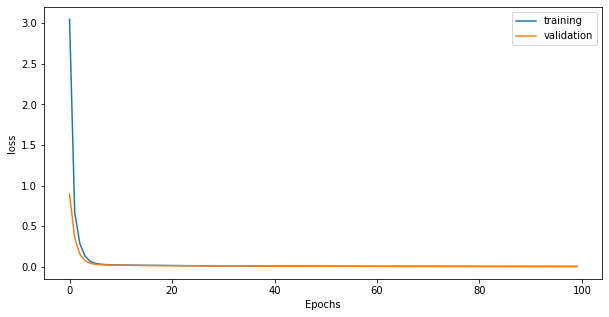

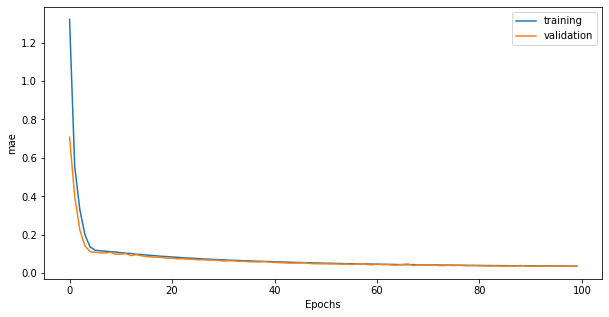

In [90]:
plot_history(reg_result1.history, 'loss')
plot_history(reg_result1.history, 'mae')

In [91]:
#set another model
regks2 = keras.Sequential([
    keras.layers.Dense(10, activation='sigmoid', input_shape=(4,3)),
    keras.layers.Dense(1)
])

# Compile the model
regks2.compile(
    optimizer='sgd',
    loss='mse', 
    metrics=['mae'])

In [92]:
# Train the model with 200 epochs
reg_result2 = regks2.fit(
    X2_train, y2_train, 
    validation_data=(X2_val, y2_val), 
    epochs=200)

Epoch 1/200
102/102 [==============================] - 0s 1ms/step - loss: 2.2676 - mae: 1.1619 - val_loss: 0.7789 - val_mae: 0.6231
Epoch 2/200
102/102 [==============================] - 0s 1ms/step - loss: 0.5452 - mae: 0.4948 - val_loss: 0.2565 - val_mae: 0.3074
Epoch 3/200
102/102 [==============================] - 0s 1ms/step - loss: 0.1904 - mae: 0.2587 - val_loss: 0.0937 - val_mae: 0.1717
Epoch 4/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0757 - mae: 0.1534 - val_loss: 0.0432 - val_mae: 0.1076
Epoch 5/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0394 - mae: 0.1134 - val_loss: 0.0267 - val_mae: 0.0970
Epoch 6/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0268 - mae: 0.1033 - val_loss: 0.0210 - val_mae: 0.0954
Epoch 7/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0220 - mae: 0.0998 - val_loss: 0.0186 - val_mae: 0.0919
Epoch 8/200
102/102 [==============================] - 0s 1ms/step - 

Epoch 57/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0040 - mae: 0.0435 - val_loss: 0.0037 - val_mae: 0.0420
Epoch 58/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0040 - mae: 0.0433 - val_loss: 0.0037 - val_mae: 0.0380
Epoch 59/200
102/102 [==============================] - 0s 990us/step - loss: 0.0039 - mae: 0.0425 - val_loss: 0.0036 - val_mae: 0.0417
Epoch 60/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0039 - mae: 0.0426 - val_loss: 0.0035 - val_mae: 0.0406
Epoch 61/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0038 - mae: 0.0422 - val_loss: 0.0035 - val_mae: 0.0404
Epoch 62/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0037 - mae: 0.0420 - val_loss: 0.0035 - val_mae: 0.0388
Epoch 63/200
102/102 [==============================] - 0s 988us/step - loss: 0.0037 - mae: 0.0414 - val_loss: 0.0034 - val_mae: 0.0393
Epoch 64/200
102/102 [==============================] - 0s

Epoch 118/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0023 - mae: 0.0327 - val_loss: 0.0022 - val_mae: 0.0324
Epoch 119/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0023 - mae: 0.0326 - val_loss: 0.0022 - val_mae: 0.0302
Epoch 120/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0023 - mae: 0.0323 - val_loss: 0.0022 - val_mae: 0.0311
Epoch 121/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0023 - mae: 0.0323 - val_loss: 0.0022 - val_mae: 0.0314
Epoch 122/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0023 - mae: 0.0322 - val_loss: 0.0022 - val_mae: 0.0337
Epoch 123/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0023 - mae: 0.0323 - val_loss: 0.0022 - val_mae: 0.0320
Epoch 124/200
102/102 [==============================] - 0s 997us/step - loss: 0.0022 - mae: 0.0323 - val_loss: 0.0022 - val_mae: 0.0296
Epoch 125/200
102/102 [==============================

102/102 [==============================] - 0s 1ms/step - loss: 0.0019 - mae: 0.0290 - val_loss: 0.0018 - val_mae: 0.0287
Epoch 179/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0019 - mae: 0.0290 - val_loss: 0.0018 - val_mae: 0.0280
Epoch 180/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0018 - mae: 0.0289 - val_loss: 0.0018 - val_mae: 0.0302
Epoch 181/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0018 - mae: 0.0290 - val_loss: 0.0018 - val_mae: 0.0286
Epoch 182/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0018 - mae: 0.0289 - val_loss: 0.0018 - val_mae: 0.0294
Epoch 183/200
102/102 [==============================] - 0s 1ms/step - loss: 0.0018 - mae: 0.0290 - val_loss: 0.0018 - val_mae: 0.0290
Epoch 184/200
102/102 [==============================] - 0s 978us/step - loss: 0.0018 - mae: 0.0289 - val_loss: 0.0018 - val_mae: 0.0287
Epoch 185/200
102/102 [==============================] - 0s 1ms/ste

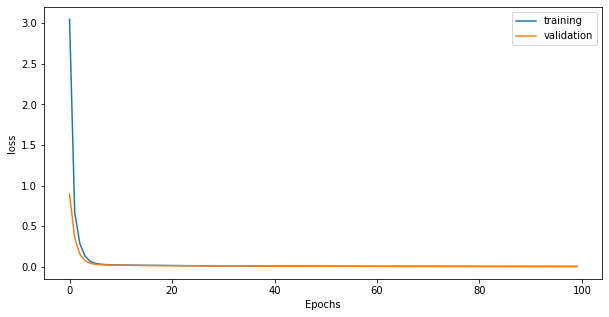

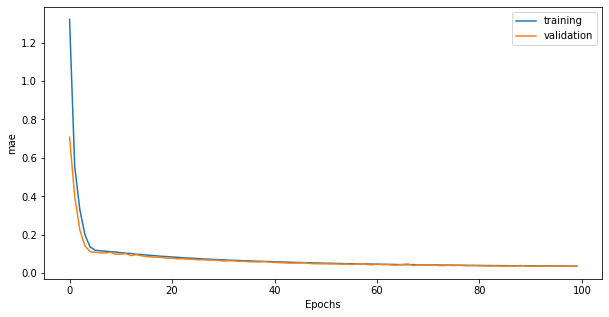

In [93]:
plot_history(reg_result1.history, 'loss')
plot_history(reg_result1.history, 'mae')

In [94]:
#set another model more dense and input shape
regks3 = keras.Sequential([
    keras.layers.Dense(20, activation='sigmoid', input_shape=(8,3)),
    keras.layers.Dense(1)
])

# Compile the model
regks3.compile(
    optimizer='sgd',
    loss='mse', 
    metrics=['mae'])

In [95]:
# Train the model with 400 epochs
reg_result3 = regks3.fit(
    X2_train, y2_train, 
    validation_data=(X2_val, y2_val), 
    epochs=400)

Epoch 1/400
102/102 [==============================] - 0s 1ms/step - loss: 2.2762 - mae: 1.1099 - val_loss: 0.5502 - val_mae: 0.5320
Epoch 2/400
102/102 [==============================] - 0s 1ms/step - loss: 0.3081 - mae: 0.3863 - val_loss: 0.0933 - val_mae: 0.1955
Epoch 3/400
102/102 [==============================] - 0s 1ms/step - loss: 0.0520 - mae: 0.1419 - val_loss: 0.0167 - val_mae: 0.0721
Epoch 4/400
102/102 [==============================] - 0s 1ms/step - loss: 0.0123 - mae: 0.0681 - val_loss: 0.0065 - val_mae: 0.0551
Epoch 5/400
102/102 [==============================] - 0s 1ms/step - loss: 0.0068 - mae: 0.0580 - val_loss: 0.0051 - val_mae: 0.0530
Epoch 6/400
102/102 [==============================] - 0s 1ms/step - loss: 0.0060 - mae: 0.0563 - val_loss: 0.0049 - val_mae: 0.0516
Epoch 7/400
102/102 [==============================] - 0s 1ms/step - loss: 0.0057 - mae: 0.0556 - val_loss: 0.0048 - val_mae: 0.0545
Epoch 8/400
102/102 [==============================] - 0s 1ms/step - 

102/102 [==============================] - 0s 1ms/step - loss: 0.0027 - mae: 0.0375 - val_loss: 0.0023 - val_mae: 0.0336
Epoch 58/400
102/102 [==============================] - 0s 1ms/step - loss: 0.0027 - mae: 0.0372 - val_loss: 0.0023 - val_mae: 0.0349
Epoch 59/400
102/102 [==============================] - 0s 1ms/step - loss: 0.0026 - mae: 0.0371 - val_loss: 0.0022 - val_mae: 0.0355
Epoch 60/400
102/102 [==============================] - 0s 1ms/step - loss: 0.0026 - mae: 0.0366 - val_loss: 0.0025 - val_mae: 0.0398
Epoch 61/400
102/102 [==============================] - 0s 1ms/step - loss: 0.0026 - mae: 0.0369 - val_loss: 0.0022 - val_mae: 0.0355
Epoch 62/400
102/102 [==============================] - 0s 1ms/step - loss: 0.0026 - mae: 0.0363 - val_loss: 0.0022 - val_mae: 0.0342
Epoch 63/400
102/102 [==============================] - 0s 1ms/step - loss: 0.0025 - mae: 0.0362 - val_loss: 0.0022 - val_mae: 0.0322
Epoch 64/400
102/102 [==============================] - 0s 1ms/step - loss:

102/102 [==============================] - 0s 1ms/step - loss: 0.0016 - mae: 0.0275 - val_loss: 0.0014 - val_mae: 0.0257
Epoch 119/400
102/102 [==============================] - 0s 1ms/step - loss: 0.0016 - mae: 0.0274 - val_loss: 0.0014 - val_mae: 0.0254
Epoch 120/400
102/102 [==============================] - 0s 1ms/step - loss: 0.0016 - mae: 0.0273 - val_loss: 0.0015 - val_mae: 0.0241
Epoch 121/400
102/102 [==============================] - 0s 1ms/step - loss: 0.0016 - mae: 0.0271 - val_loss: 0.0013 - val_mae: 0.0256
Epoch 122/400
102/102 [==============================] - 0s 1ms/step - loss: 0.0016 - mae: 0.0272 - val_loss: 0.0013 - val_mae: 0.0246
Epoch 123/400
102/102 [==============================] - 0s 1ms/step - loss: 0.0015 - mae: 0.0269 - val_loss: 0.0014 - val_mae: 0.0269
Epoch 124/400
102/102 [==============================] - 0s 1ms/step - loss: 0.0015 - mae: 0.0269 - val_loss: 0.0013 - val_mae: 0.0244
Epoch 125/400
102/102 [==============================] - 0s 1ms/step 

Epoch 179/400
102/102 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0227 - val_loss: 9.8563e-04 - val_mae: 0.0211
Epoch 180/400
102/102 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0227 - val_loss: 9.9227e-04 - val_mae: 0.0204
Epoch 181/400
102/102 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0226 - val_loss: 9.8617e-04 - val_mae: 0.0204
Epoch 182/400
102/102 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0225 - val_loss: 9.8055e-04 - val_mae: 0.0218
Epoch 183/400
102/102 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0226 - val_loss: 9.7427e-04 - val_mae: 0.0215
Epoch 184/400
102/102 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0226 - val_loss: 9.6626e-04 - val_mae: 0.0208
Epoch 185/400
102/102 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0224 - val_loss: 9.7224e-04 - val_mae: 0.0219
Epoch 186/400
102/102 [====

102/102 [==============================] - 0s 1ms/step - loss: 9.0152e-04 - mae: 0.0199 - val_loss: 8.0661e-04 - val_mae: 0.0178
Epoch 238/400
102/102 [==============================] - 0s 1ms/step - loss: 9.0048e-04 - mae: 0.0198 - val_loss: 7.9645e-04 - val_mae: 0.0186
Epoch 239/400
102/102 [==============================] - 0s 1ms/step - loss: 8.9654e-04 - mae: 0.0199 - val_loss: 7.9662e-04 - val_mae: 0.0189
Epoch 240/400
102/102 [==============================] - 0s 1ms/step - loss: 8.9309e-04 - mae: 0.0198 - val_loss: 7.9255e-04 - val_mae: 0.0183
Epoch 241/400
102/102 [==============================] - 0s 1ms/step - loss: 8.9106e-04 - mae: 0.0197 - val_loss: 7.8883e-04 - val_mae: 0.0189
Epoch 242/400
102/102 [==============================] - 0s 1ms/step - loss: 8.8655e-04 - mae: 0.0197 - val_loss: 7.8519e-04 - val_mae: 0.0184
Epoch 243/400
102/102 [==============================] - 0s 1ms/step - loss: 8.8388e-04 - mae: 0.0197 - val_loss: 8.1097e-04 - val_mae: 0.0204
Epoch 244/400

102/102 [==============================] - 0s 1ms/step - loss: 7.5807e-04 - mae: 0.0181 - val_loss: 6.9561e-04 - val_mae: 0.0181
Epoch 295/400
102/102 [==============================] - 0s 1ms/step - loss: 7.5685e-04 - mae: 0.0180 - val_loss: 6.9502e-04 - val_mae: 0.0181
Epoch 296/400
102/102 [==============================] - 0s 1ms/step - loss: 7.5378e-04 - mae: 0.0180 - val_loss: 6.8263e-04 - val_mae: 0.0163
Epoch 297/400
102/102 [==============================] - 0s 1ms/step - loss: 7.5151e-04 - mae: 0.0178 - val_loss: 6.7677e-04 - val_mae: 0.0165
Epoch 298/400
102/102 [==============================] - 0s 1ms/step - loss: 7.5031e-04 - mae: 0.0178 - val_loss: 6.7638e-04 - val_mae: 0.0167
Epoch 299/400
102/102 [==============================] - 0s 1ms/step - loss: 7.4831e-04 - mae: 0.0178 - val_loss: 6.7581e-04 - val_mae: 0.0170
Epoch 300/400
102/102 [==============================] - 0s 1ms/step - loss: 7.4523e-04 - mae: 0.0178 - val_loss: 6.6964e-04 - val_mae: 0.0166
Epoch 301/400

102/102 [==============================] - 0s 1ms/step - loss: 6.5868e-04 - mae: 0.0166 - val_loss: 6.0355e-04 - val_mae: 0.0157
Epoch 352/400
102/102 [==============================] - 0s 992us/step - loss: 6.5678e-04 - mae: 0.0165 - val_loss: 6.0444e-04 - val_mae: 0.0164
Epoch 353/400
102/102 [==============================] - 0s 996us/step - loss: 6.5645e-04 - mae: 0.0166 - val_loss: 6.0017e-04 - val_mae: 0.0158
Epoch 354/400
102/102 [==============================] - 0s 1ms/step - loss: 6.5465e-04 - mae: 0.0165 - val_loss: 5.9915e-04 - val_mae: 0.0150
Epoch 355/400
102/102 [==============================] - 0s 988us/step - loss: 6.5389e-04 - mae: 0.0164 - val_loss: 6.3244e-04 - val_mae: 0.0186
Epoch 356/400
102/102 [==============================] - 0s 997us/step - loss: 6.5148e-04 - mae: 0.0167 - val_loss: 5.9829e-04 - val_mae: 0.0149
Epoch 357/400
102/102 [==============================] - 0s 998us/step - loss: 6.5012e-04 - mae: 0.0164 - val_loss: 5.9675e-04 - val_mae: 0.0149
Epo

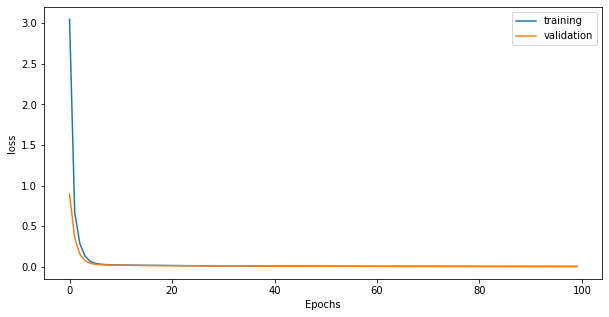

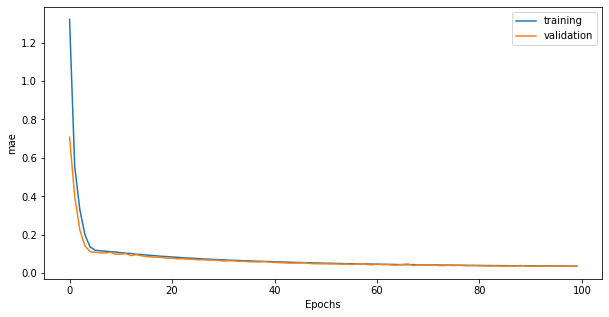

In [96]:
plot_history(reg_result1.history, 'loss')
plot_history(reg_result1.history, 'mae')

In [97]:
regks1.evaluate(X2_test, y2_test)
regks2.evaluate(X2_test, y2_test)
regks3.evaluate(X2_test, y2_test)

45/45 [==============================] - 0s 598us/step - loss: 8.7768e-04 - mae: 0.0180


[0.0008776833419688046, 0.018039997667074203]

In [98]:
#as we can see from the result, the regks3 is the best model with his parameters because
# it has the lowest loss and the lowest mae